# Step 1 : Data Acquisition
https://www.pewresearch.org/science/2022/03/01/carbon-neutral-2050-methodology/

- This dataset is from Pew Research Center
- ATP W48.5 Survey originally contains 1,284 qualified veteran respondents and 147 variables.

# Step 2 :  Data Preparation

## Data selection in Excel
Remove most irrelevant columns(mostly political or war related) by looking at the survey questions

1. Remove Duplicates
   - LASTERA: last era they serve. Similar to ERAACS_1 
   - F_EDUCCAT: Similar to EDUCCAT2, but less specific
   - F_RACECMB: Similar to F_RACETHN, but half of the rows are blank
   - F_INCOME_RECODE: Similar to F_INCOME, but less specific
  
  
2. Delete _W48.5 in all column names by using replace  
3. 52 columns remained 
4. Import csv to Jupyter Notebook

## Check Data in Jupyter

In [1]:
# Import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file
df = pd.read_csv("/Users/emilychaukang/Desktop/DS/Portfolio and Projects/Data Science  Projects/1. ATP W48.5 Survey/Jupyter Notebook & Original Code/W48.5_May19/2.Prepared Data/ATP_Data_only_20241121.csv")

In [3]:
# Check variables' data type
# Most columns' data types are float,but they're actually categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   QKEY          2371 non-null   int64  
 1   XVET          2371 non-null   int64  
 2   SERVEDACS     1284 non-null   float64
 3   ERAACS_1      1284 non-null   float64
 4   BRANCH_1      1284 non-null   float64
 5   BRANCH_2      1284 non-null   float64
 6   BRANCH_3      1284 non-null   float64
 7   BRANCH_4      1284 non-null   float64
 8   BRANCH_5      1284 non-null   float64
 9   BRANCH_6      1284 non-null   float64
 10  BRANCH_7      1284 non-null   float64
 11  BRANCH_8      1284 non-null   float64
 12  BRANCH_9      1284 non-null   float64
 13  BRANCH_10     1284 non-null   float64
 14  BRANCH_11     1284 non-null   float64
 15  BRANCH_12     1284 non-null   float64
 16  BRANCH_97     1284 non-null   float64
 17  SATLIFEb      2371 non-null   int64  
 18  SATLIFEc      1306 non-null 

In [4]:
df.head()

,QKEY,XVET,SERVEDACS,ERAACS_1,BRANCH_1,BRANCH_2,BRANCH_3,BRANCH_4,BRANCH_5,BRANCH_6,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,F_INCOME,WEIGHT_GP,WEIGHT_VET
0,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,1,5,2,1,1,9,0.646029,NaN
1,17,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,2,6,2,1,1,9,1.047892,NaN
2,20,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4,2,2,2,1,5,6,0.661774,NaN
3,21,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4,1,6,2,2,3,7,0.862188,NaN
4,23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,2,1,2,1,1,9,0.871072,NaN


In [5]:
# Original 53 columns
# We have 53 features
len(df.columns)

53

## Data Selection and Feature Creation in Jupyter Notebook

   

2. Remove unnecessary variables
   - QKEY : We don't need this identifier since we have index already
   - Remove column "SERVEDACS","ERAACS_1",and "XVET" after creating "Group" variable
   - Remove "BRANCH_1" to "BRANCH_97" after creating "Branch" variable
   - Remove "WEIGHT_GP" since they are only for Gen_pop
   - Remove "WEIGHT_VET: since we are not using the weight here
   
   
3. Create variables
   - Group : from SERVEDACS and ERRACS_1 ; values: {Gen_pop,pre-911,post-911}
   - Branch : from all BRANCH columns ;  values: {Army,Navy,Air_Force,Marines,Coast_Guard,Muti-Branch,Refused,Not_Vet}
   
   
4. Drop all rows that are Gen_pop
This data is not useful for us. We are only interested in veterans.


5. 32 variables left

### Remove duplicates and unwanted columns
- CIVADJPROBc,CIVADJPROBd,CIVADJPROBe(duplicates): Similar to CIVADJPROBa and CIVADJPROBb

In [6]:
# These features are Duplicates
# We also don't need QKEY since we have index already
df =df.drop(["CIVADJPROBc","CIVADJPROBd","CIVADJPROBe","QKEY","WEIGHT_GP","WEIGHT_VET"],axis=1)

In [7]:
# 53- 6 =47
len(df.columns)

47

### Create "Group" variable from "SERVEDACS" and "ERRACS_1"

In [8]:
# There are 3 groups of repondents in this data 
# SERVEDAS : whether they are veterans = 4
df['SERVEDACS'].unique()

array([nan,  4.])

In [9]:
# ERAACS_1 : when did you serve on active duty
# 0 : pre 9/11, 1 : post 9/11
df['ERAACS_1'].unique()

array([nan,  1.,  0.])

In [10]:
# Apply using multiple columns
def grouping(vets,post):
    if vets == 4.0 and post == 1.0:
        return ('post_911')
    elif vets == 4.0 and post == 0.0:
        return ('pre_911')
    else: 
        return ('Gen_pop')

In [11]:
# Create a new column "Group"
# Use np.vectorize
df['Group'] = np.vectorize(grouping)(df['SERVEDACS'],df['ERAACS_1'])
df['Group']

0        Gen_pop
1        Gen_pop
2        Gen_pop
3        Gen_pop
4        Gen_pop
          ...   
2366     pre_911
2367    post_911
2368     pre_911
2369     pre_911
2370     pre_911
Name: Group, Length: 2371, dtype: object

In [12]:
# Now, we have 1 additional column 47+1 = 48
len(df.columns)

48

In [13]:
# Check whether the results are correct
df[['SERVEDACS','ERAACS_1','Group']]

,SERVEDACS,ERAACS_1,Group
0,NaN,NaN,Gen_pop
1,NaN,NaN,Gen_pop
2,NaN,NaN,Gen_pop
3,NaN,NaN,Gen_pop
4,NaN,NaN,Gen_pop
...,...,...,...
2366,4.0,0.0,pre_911
2367,4.0,1.0,post_911
2368,4.0,0.0,pre_911
2369,4.0,0.0,pre_911


In [14]:
df['Group'].value_counts()

Gen_pop     1087
pre_911      797
post_911     487
Name: Group, dtype: int64

In [15]:
# Let's make sure the values in 'Group' are correct
pre_911_vets = df[(df['SERVEDACS']== 4.0) & (df['ERAACS_1']==0.0)]
len(pre_911_vets)

797

In [16]:
post_911_vets = df[(df['SERVEDACS']== 4.0) & (df['ERAACS_1']==1.0)]
len(post_911_vets)

487

In [17]:
Gen_pop = df[df['SERVEDACS'].isnull()]
len(Gen_pop)

1087

In [18]:
# Check the values in 'XVET' and 'Group' match
# XVET : 1="KP Gen Pop",2="KP Vets",3='ATP Vets'
df[['XVET','Group']]

,XVET,Group
0,1,Gen_pop
1,1,Gen_pop
2,1,Gen_pop
3,1,Gen_pop
4,1,Gen_pop
...,...,...
2366,3,pre_911
2367,3,post_911
2368,3,pre_911
2369,3,pre_911


In [19]:
# 'XVET' =2 : KP Vets
df[df['XVET'] == 2][['XVET','Group']]

,XVET,Group
17,2,post_911
18,2,post_911
25,2,post_911
29,2,post_911
32,2,post_911
...,...,...
1649,2,post_911
1650,2,post_911
1651,2,post_911
1652,2,post_911


In [20]:
# In Reserach Methodology, it specified that KP Vets are all post-911
# Let's check whether it's true : Yes
df[df['XVET'] == 2]['Group'].unique()

array(['post_911'], dtype=object)

In [21]:
# 174 post-911 veterans from ATP
# 313 post-911 veterns are from KP
df[df['Group']=="post_911"]['XVET'].value_counts()

2    313
3    174
Name: XVET, dtype: int64

In [22]:
# Drop 'SERVEDACS','ERAACS_1','XVET'since we don't need this anymore
df = df.drop(['SERVEDACS','ERAACS_1','XVET'],axis=1)

In [23]:
# 46-1 =45 columns
len(df.columns)

45

### Dropping general population group

In [24]:
# Let's seperate Gen_pop from Vets by dropping tham from our data(df)
# Keep only Veterans on our data
# pre_911      797
# post_911     487
df = df[df['Group'] != 'Gen_pop']

In [25]:
# 2371-1087 =1284
len(df)

1284

### Create "Branch"

In [26]:
# "BRANCH_1 to BRANCH_97“ are Y/N questions asking for branches
# They are like dummy variables (0 or 1)
df.columns

Index(['BRANCH_1', 'BRANCH_2', 'BRANCH_3', 'BRANCH_4', 'BRANCH_5', 'BRANCH_6',
       'BRANCH_7', 'BRANCH_8', 'BRANCH_9', 'BRANCH_10', 'BRANCH_11',
       'BRANCH_12', 'BRANCH_97', 'SATLIFEb', 'SATLIFEc', 'YEARSERV', 'RANK',
       'MARRACTIV', 'PARACTIV', 'COMBAT', 'INJURED', 'MILTOCIV', 'CIVADJ',
       'VABENEFITS', 'CIVADJPROBa', 'CIVADJPROBb', 'CIVADJISSc', 'CIVADJISSe',
       'HADJOB', 'LOOKJOB', 'SCHOOL', 'MILJOBSKILLS', 'FINDJOB', 'JOBQUAL',
       'FIRSTJOB', 'MILHELPJOB', 'TRAUMA1', 'F_AGECAT', 'F_SEX', 'F_EDUCCAT2',
       'F_HISP', 'F_RACETHN', 'F_MARITAL', 'F_INCOME', 'Group'],
      dtype='object')

In [27]:
# Let's work on combining all BRANCH columns into 1 column
df[['BRANCH_1', 'BRANCH_2', 'BRANCH_3', 'BRANCH_4', 'BRANCH_5',
       'BRANCH_6', 'BRANCH_7', 'BRANCH_8', 'BRANCH_9', 'BRANCH_10',
       'BRANCH_11', 'BRANCH_12', 'BRANCH_97']]

,BRANCH_1,BRANCH_2,BRANCH_3,BRANCH_4,BRANCH_5,BRANCH_6,BRANCH_7,BRANCH_8,BRANCH_9,BRANCH_10,BRANCH_11,BRANCH_12,BRANCH_97
17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2367,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2368,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2369,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Create a function that combine BRANCH
# Some people click two options(ex. Army-->Navy)

# Abbreviation are as below 
# Army = A, Navy = N, Air Force = AF, Marines = M, 
# Coast Guard = CG, ARMY National Guard =AG, Army Reserves = AR, 
# Navy Reserves = NR, Air Force Reserves = AF_R, Marine Reserves = MR
# Coast Guard Reserves = CG_R, Air National Guard =AN_G

# I combine the following :
# A, AG, AR = A
# AF, AF_R,AN_G = AF
# N, NR =N
# M, MR =M
# CG, CG_R =CG

def combine_branch(A,N,AF,M,CG,AG,AR,NR,AF_R,MR,CG_R,AN_G,O):
    if (A == 1.0):
        if (N ==0.0 and AF ==0.0 and M ==0.0 and CG ==0.0and (AG == 0.0 or AG ==1.0) and (AR == 0.0 or AR ==1.0)and NR ==0.0 and AF_R ==0.0 and MR ==0.0 and CG_R ==0.0 and AN_G ==0.0 and O==0.0):
            return 'Army'
        else:
            return 'Muti-Branch'
    
    # Respondents refused to answer actually refused all branches questions, so we only need to detect one 99
    elif A == 99.0:
        return 'Refused'
    elif N == 1.0:
        if (AF==0.0 and M==0.0 and CG==0.0 and AG==0.0 and AR==0.0 and (NR==0.0 or NR==1.0) and AF_R ==0.0 and MR==0.0 and CG_R==0.0 and AN_G==0.0 and O==0.0):
            return 'Navy'
        else:
            return 'Muti-Branch' 
    elif AF == 1.0:
        if (M==0.0 and CG==0.0 and AG==0.0 and AR==0.0 and NR==0.0 and (AF_R==0.0 or AF_R==1.0) and MR==0.0 and CG_R==0.0 and (AN_G==0.0 or AN_G==1.0) and O==0.0):
            return 'Air_Force'
        else:
            return 'Muti-Branch' 
    elif M == 1.0:
        if (CG==0.0 and AG==0.0 and AR==0.0 and NR==0.0 and AF_R==0.0 and (MR==0.0 or MR==1.0) and CG_R==0.0 and AN_G==0.0 and O==0.0):
            return 'Marines'
        else:
            return 'Muti-Branch'
    elif CG == 1.0:
        if (AG==0.0 and AR==0.0 and NR==0.0 and AF_R==0.0 and MR==0.0 and (CG_R==0.0 or CG_R==1.0) and AN_G==0.0 and O==0.0):
            return 'Coast_Guard'
        else:
            return 'Muti-Branch'
    elif AG == 1.0:
        if ((AR==0.0 or AR==1.0) and NR==0.0 and AF_R==0.0 and MR==0.0 and CG_R==0.0 and AN_G==0.0 and O==0.0):
            return "Army"
        else:
            return 'Muti-Branch'
    elif AR == 1.0:
        if (NR==0.0 and AF_R==0.0 and MR==0.0 and CG_R==0.0 and AN_G==0.0 and O==0.0):
            return 'Army'
        else:
            return 'Muti-Branch'
    elif NR == 1.0:
        if (AF_R==0.0 and MR==0.0 and CG_R==0.0 and AN_G==0.0 and O==0.0):
            return 'Navy'
        else:
            return 'Muti-Branch'
    elif AF_R == 1.0:
        if (MR==0.0 and CG_R==0.0 and (AN_G==0.0 or AN_G==1.0) and O==0.0):
            return 'Air_Force'
        else:
            return 'Muti-Branch'
    elif MR == 1.0:
        if (CG_R==0.0 and AN_G==0.0 and O==0.0):
            return 'Marines'
        else:
            return 'Muti-Branch'
    elif CG_R == 1.0:
        if (AN_G==0.0 and O==0.0):
            return 'Coast_Guard'
        else:
            return 'Muti-Branch'
    elif AN_G == 1.0:
        if (O==0.0):
            return 'Air_Force'
        else:
            return 'Muti-Branch'
    elif O == 1.0:
        return 'Other'     
    else :
        return 'Not_Vet'

In [29]:
# Vetorize : Returns an object that acts like pyfunc, but takes arrays as input
df['Branch'] = np.vectorize(combine_branch)(df['BRANCH_1'],df['BRANCH_2'],df['BRANCH_3'],df['BRANCH_4'],df['BRANCH_5'],df['BRANCH_6'],df['BRANCH_7'],df['BRANCH_8'],df['BRANCH_9'],df['BRANCH_10'],df['BRANCH_11'],df['BRANCH_12'],df['BRANCH_97'])

np.vetorize() : https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html

In [30]:
df['Branch'].value_counts()

Army           507
Air_Force      308
Navy           278
Marines        127
Muti-Branch     49
Coast_Guard     13
Refused          2
Name: Branch, dtype: int64

In [31]:
# Drop people who doesn't answer Branch 2371-2 = 2369 applicants
miss_branch = df[df['Branch']== 'Refused']
miss_branch

,BRANCH_1,BRANCH_2,BRANCH_3,BRANCH_4,BRANCH_5,BRANCH_6,BRANCH_7,BRANCH_8,BRANCH_9,BRANCH_10,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,F_INCOME,Group,Branch
1572,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,1.0,3,1,2,2,1,1,7,pre_911,Refused
1752,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,2.0,1,2,1,1,3,6,1,pre_911,Refused


In [32]:
df = df.drop(miss_branch.index,axis=0)

In [33]:
# Number of rows after dropping people who don't answer branch 
len(df)

1282

In [34]:
# Now, we can drop all BRANCH columns
df = df.drop(['BRANCH_1', 'BRANCH_2', 'BRANCH_3', 'BRANCH_4', 'BRANCH_5',
       'BRANCH_6', 'BRANCH_7', 'BRANCH_8', 'BRANCH_9', 'BRANCH_10',
       'BRANCH_11', 'BRANCH_12', 'BRANCH_97'],axis=1)

In [35]:
# 45-13+1 = 33
len(df.columns)

33

## Data Transformation 1

### Transforming Labels to Strings and Combining Labels using .map(My_map)
In the original data, all columns are randomly labeled with numbers (sometime ascending or descending). I  wanted to transform all data into text first and encode them with different methods such as dummy encoding and ordinal encoding later. I also checked whether there are typo in the data and corrected them through transformation. For all columns, I  changed 99 : 'Refused" to NaN values.


In [36]:
df.columns

Index(['SATLIFEb', 'SATLIFEc', 'YEARSERV', 'RANK', 'MARRACTIV', 'PARACTIV',
       'COMBAT', 'INJURED', 'MILTOCIV', 'CIVADJ', 'VABENEFITS', 'CIVADJPROBa',
       'CIVADJPROBb', 'CIVADJISSc', 'CIVADJISSe', 'HADJOB', 'LOOKJOB',
       'SCHOOL', 'MILJOBSKILLS', 'FINDJOB', 'JOBQUAL', 'FIRSTJOB',
       'MILHELPJOB', 'TRAUMA1', 'F_AGECAT', 'F_SEX', 'F_EDUCCAT2', 'F_HISP',
       'F_RACETHN', 'F_MARITAL', 'F_INCOME', 'Group', 'Branch'],
      dtype='object')

In [37]:
len(df)

1282

#### SATLIFEb : Satisfaction Level of personal financial situation

In [38]:
# Use .map(my_map)
# Original Label : 1:'Very Satisfied',2:'Somewhat Satisfied'
# 3:'Somewhat Dissatisfied',4:'Very Dissatisfied',99:'Refused'
df['SATLIFEb'].value_counts()

2     564
1     423
3     208
4      86
99      1
Name: SATLIFEb, dtype: int64

In [39]:
SATLIFEb_map = {1:'Very Satisfied',2:'Somewhat Satisfied'
                ,3:'Somewhat Dissatisfied',4:'Very Dissatisfied',99:np.nan}

In [40]:
df['SATLIFEb'] = df['SATLIFEb'].map(SATLIFEb_map) 

In [41]:
# Check whether the convert result match the original data
df['SATLIFEb'].value_counts()

Somewhat Satisfied       564
Very Satisfied           423
Somewhat Dissatisfied    208
Very Dissatisfied         86
Name: SATLIFEb, dtype: int64

In [42]:
# Check whether the number of NaN is correct (original : 99) 
df['SATLIFEb'].isnull().sum()

1

#### SATLIFEc : Satisfaction Level of current job or career
This is a filtered question. It is only answered by currently employed veterans.

In [43]:
# There are a lot of NaN values 
df['SATLIFEc'].isnull().value_counts()

True     642
False    640
Name: SATLIFEc, dtype: int64

In [44]:
# Use .map(my_map)
# Original Label : 1:'Very Satisfied',2:'Somewhat Satisfied'
# 3:'Somewhat Dissatisfied',4:'Very Dissatisfied',99:'Refused'
df['SATLIFEc'].value_counts()

2.0    296
1.0    235
3.0     79
4.0     30
Name: SATLIFEc, dtype: int64

In [45]:
SATLIFEc_map = {1:'Very Satisfied',2:'Somewhat Satisfied'
                ,3:'Somewhat Dissatisfied',4:'Very Dissatisfied',99:np.nan}

In [46]:
df['SATLIFEc'] = df['SATLIFEc'].map(SATLIFEc_map) 

In [47]:
# Check whether the convert result match the original data
df['SATLIFEc'].value_counts()

Somewhat Satisfied       296
Very Satisfied           235
Somewhat Dissatisfied     79
Very Dissatisfied         30
Name: SATLIFEc, dtype: int64

#### YEARSERV : How many years serverd

In [48]:
# YEARSERV
df['YEARSERV'].value_counts()

2.0     460
5.0     262
1.0     258
3.0     229
4.0      72
99.0      1
Name: YEARSERV, dtype: int64

In [49]:
YEARSERV_map = {1.0:'< 2 years',2.0:'3-4 years',
                3.0:'5-9 years',4.0:'10-19 years',5.0:'>20 years',99:np.nan}

In [50]:
df['YEARSERV'] = df['YEARSERV'].map(YEARSERV_map) 

In [51]:
# Check whether the convert result match the original data
df['YEARSERV'].value_counts()

3-4 years      460
>20 years      262
< 2 years      258
5-9 years      229
10-19 years     72
Name: YEARSERV, dtype: int64

In [52]:
# Check whether the number of NaN is correct (original : 99) 
df['YEARSERV'].isnull().sum()

1

#### RANK : Rank in military
I combined 'Reserves' with 'Refused' because 'Reserves' is not a rank.

In [53]:
df['RANK'].value_counts()

4.0     548
2.0     453
1.0     241
3.0      18
5.0      13
99.0      9
Name: RANK, dtype: int64

In [54]:
RANK_map = {1:'O1-O10',2:'E7-E9',3:'WO1-WO5',4:'E1-E6',5:np.nan,99:np.nan}

In [55]:
df['RANK'] = df['RANK'].map(RANK_map) 

In [56]:
# Check whether the convert result match the original data
df['RANK'].value_counts()

E1-E6      548
E7-E9      453
O1-O10     241
WO1-WO5     18
Name: RANK, dtype: int64

In [57]:
# Check whether the number of NaN is correct (original : 99) 
df['RANK'].isnull().sum()

22

#### MARRACTIV :  Whether married during active duty

In [58]:
# MARRACTIV
# Whether married during active duty
df['MARRACTIV'].value_counts()

1.0     701
2.0     578
99.0      3
Name: MARRACTIV, dtype: int64

In [59]:
MARRACTIV_map = {1:'Married',2:'Not Married',99:np.nan}

In [60]:
df['MARRACTIV'] = df['MARRACTIV'].map(MARRACTIV_map) 

In [61]:
# Check whether the convert result match the original data
df['MARRACTIV'].value_counts()

Married        701
Not Married    578
Name: MARRACTIV, dtype: int64

In [62]:
# Check whether the number of NaN is correct (original : 99) 
df['MARRACTIV'].isnull().sum()

3

#### PARACTIV : Parent to a child <18

In [63]:
# PARACTIV
# Parent to a child <18
df['PARACTIV'].value_counts()

2.0     800
1.0     476
99.0      6
Name: PARACTIV, dtype: int64

In [64]:
PARACTIV_map = {1:'Yes',2:'No',99:np.nan}

In [65]:
df['PARACTIV'] = df['PARACTIV'].map(PARACTIV_map) 

In [66]:
# Check whether the convert result match the original data
df['PARACTIV'].value_counts()

No     800
Yes    476
Name: PARACTIV, dtype: int64

In [67]:
# Check whether the number of NaN is correct (original : 99) 
df['PARACTIV'].isnull().sum()

6

#### COMBAT : Whether serve in combat

In [68]:
# COMBAT
df['COMBAT'].value_counts()

2.0     733
1.0     540
99.0      9
Name: COMBAT, dtype: int64

In [69]:
COMBAT_map = {1:'Yes',2:'No',99:np.nan}

In [70]:
df['COMBAT'] = df['COMBAT'].map(COMBAT_map) 

In [71]:
# Check whether the convert result match the original data
df['COMBAT'].value_counts()

No     733
Yes    540
Name: COMBAT, dtype: int64

In [72]:
# Check whether the number of NaN is correct (original : 99) 
df['COMBAT'].isnull().sum()

9

#### INJURED : Whether seriously injured
I combined 1 and 3 since I want to know whether they are injured in combat

In [73]:
# INJURED
# We combine 1 and 3 since we want to know whether they are injured in combat
df['INJURED'].value_counts()

4.0     1031
2.0      187
1.0       37
3.0       20
99.0       7
Name: INJURED, dtype: int64

In [74]:
INJURED_map = {1:'Injured in combat',2:'Injured out of combat',3:'Injured in combat',4:'Not injured',99:np.nan}

In [75]:
df['INJURED'] = df['INJURED'].map(INJURED_map) 

In [76]:
# Check whether the convert result match the original data
df['INJURED'].value_counts()

Not injured              1031
Injured out of combat     187
Injured in combat          57
Name: INJURED, dtype: int64

In [77]:
# Check whether the number of NaN is correct (original : 99) 
df['INJURED'].isnull().sum()

7

#### MILTOCIV : How well did the military prepare you for the transition to CIVILIAN life 

In [78]:
df['MILTOCIV'].value_counts()

2.0     477
3.0     376
1.0     225
4.0     187
99.0     17
Name: MILTOCIV, dtype: int64

In [79]:
MILTOCIV_map = {1:'Very well',2:'Somewhat well',3:'Not too well',4:'Not well at all',99:np.nan}

In [80]:
df['MILTOCIV'] = df['MILTOCIV'].map(MILTOCIV_map) 

In [81]:
# Check whether the convert result match the original data
df['MILTOCIV'].value_counts()

Somewhat well      477
Not too well       376
Very well          225
Not well at all    187
Name: MILTOCIV, dtype: int64

In [82]:
# Check whether the number of NaN is correct (original : 99) 
df['MILTOCIV'].isnull().sum()

17

#### CIVADJ : How easy to adjust to civilian life 

In [83]:
df['CIVADJ'].value_counts()

2.0     471
1.0     426
3.0     293
4.0      85
99.0      7
Name: CIVADJ, dtype: int64

In [84]:
CIVADJ_map = {1:'Very Easy',2:'Somewhat Easy',3:'Somewhat difficult',4:'Very difficult',99:np.nan}

In [85]:
df['CIVADJ'] = df['CIVADJ'].map(CIVADJ_map) 

In [86]:
# Check whether the convert result match the original data
df['CIVADJ'].value_counts()

Somewhat Easy         471
Very Easy             426
Somewhat difficult    293
Very difficult         85
Name: CIVADJ, dtype: int64

In [87]:
# Check whether the number of NaN is correct (original : 99) 
df['CIVADJ'].isnull().sum()

7

#### VABENEFITS : Do you receive any VA benefits

In [88]:
df['VABENEFITS'].value_counts()

1.0     983
2.0     295
99.0      4
Name: VABENEFITS, dtype: int64

In [89]:
VABENEFITS_map = {1:'Yes',2:'No',99:np.nan}

In [90]:
df['VABENEFITS'] = df['VABENEFITS'].map(VABENEFITS_map) 

In [91]:
# Check whether the convert result match the original data
df['VABENEFITS'].value_counts()

Yes    983
No     295
Name: VABENEFITS, dtype: int64

In [92]:
# Check whether the number of NaN is correct (original : 99) 
df['VABENEFITS'].isnull().sum()

4

#### CIVADJPROBa : Few years after you left, do you have trouble paying bills

In [93]:
# CIVADJPROBa
df['CIVADJPROBa'].value_counts()

2.0     852
1.0     424
99.0      6
Name: CIVADJPROBa, dtype: int64

In [94]:
CIVADJPROBa_map = {1:'Yes',2:'No',99:np.nan}

In [95]:
df['CIVADJPROBa'] = df['CIVADJPROBa'].map(CIVADJPROBa_map) 

In [96]:
# Check whether the convert result match the original data
df['CIVADJPROBa'].value_counts()

No     852
Yes    424
Name: CIVADJPROBa, dtype: int64

In [97]:
# Check whether the number of NaN is correct (original : 99) 
df['CIVADJPROBa'].isnull().sum()

6

#### CIVADJPROBb : Few years after you left, do you receive food benefits for gov

In [98]:
df['CIVADJPROBb'].value_counts()

2.0     1145
1.0      131
99.0       6
Name: CIVADJPROBb, dtype: int64

In [99]:
CIVADJPROBb_map = {1:'Yes',2:'No',99:np.nan}

In [100]:
df['CIVADJPROBb'] = df['CIVADJPROBb'].map(CIVADJPROBb_map) 

In [101]:
# Check whether the convert result match the original data
df['CIVADJPROBb'].value_counts()

No     1145
Yes     131
Name: CIVADJPROBb, dtype: int64

In [102]:
# Check whether the number of NaN is correct (original : 99) 
df['CIVADJPROBb'].isnull().sum()

6

#### CIVADJISSc : Few years after you left, how optimistic you feel about your future 

In [103]:
df['CIVADJISSc'].value_counts()

1.0     637
2.0     462
3.0     122
4.0      55
99.0      6
Name: CIVADJISSc, dtype: int64

In [104]:
CIVADJISSc_map = {1:'Frequently',2:'Sometimes',3:'Seldom',4:'Never',99:np.nan}

In [105]:
df['CIVADJISSc'] = df['CIVADJISSc'].map(CIVADJISSc_map) 

In [106]:
# Check whether the convert result match the original data
df['CIVADJISSc'].value_counts()

Frequently    637
Sometimes     462
Seldom        122
Never          55
Name: CIVADJISSc, dtype: int64

In [107]:
# Check whether the number of NaN is correct (original : 99) 
df['CIVADJISSc'].isnull().sum()

6

#### CIVADJISSe : Few years after you left, How often you have difficulty dealing with the lack of structure in civilian life 

In [108]:
# CIVADJISSe
df['CIVADJISSe'].value_counts()

4.0     512
2.0     319
3.0     305
1.0     139
99.0      7
Name: CIVADJISSe, dtype: int64

In [109]:
CIVADJISSe_map = {1:'Frequently',2:'Sometimes',3:'Seldom',4:'Never',99:np.nan}

In [110]:
df['CIVADJISSe'] = df['CIVADJISSe'].map(CIVADJISSe_map) 

In [111]:
# Check whether the convert result match the original data
df['CIVADJISSe'].value_counts()

Never         512
Sometimes     319
Seldom        305
Frequently    139
Name: CIVADJISSe, dtype: int64

In [112]:
# Check whether the number of NaN is correct (original : 99) 
df['CIVADJISSe'].isnull().sum()

7

#### HADJOB : Do you have a job lined up when you left

In [113]:
# HADJOB
# Do you have a job lined up when you left
df['HADJOB'].value_counts()

2.0     887
1.0     387
99.0      8
Name: HADJOB, dtype: int64

In [114]:
HADJOB_map = {1:'Yes',2:'No',99:np.nan}

In [115]:
df['HADJOB'] = df['HADJOB'].map(HADJOB_map) 

In [116]:
# Check whether the convert result match the original data
df['HADJOB'].value_counts()

No     887
Yes    387
Name: HADJOB, dtype: int64

In [117]:
# Check whether the number of NaN is correct (original : 99) 
df['HADJOB'].isnull().sum()

8

#### LOOKJOB : When you left, did you look for job (HADJOB =2)

In [118]:
# HADJOB = 887
df['LOOKJOB'].value_counts()

1.0     550
2.0     263
3.0      73
99.0      1
Name: LOOKJOB, dtype: int64

In [119]:
LOOKJOB_map = {1:'Yes(right away)',2:'Yes(Not right away)',3:'No/Retired',99:np.nan}

In [120]:
df['LOOKJOB'] = df['LOOKJOB'].map(LOOKJOB_map) 

In [121]:
# Check whether the convert result match the original data
df['LOOKJOB'].value_counts()

Yes(right away)        550
Yes(Not right away)    263
No/Retired              73
Name: LOOKJOB, dtype: int64

In [122]:
# Check whether the number of NaN is correct (original : 99) 
df['LOOKJOB'].isnull().sum()

396

In [123]:
df['LOOKJOB'].notnull().sum()

886

#### SCHOOL : After you left, did you enroll in school
Combine full-time and part-time

In [124]:
df['SCHOOL'].value_counts()

3.0     580
1.0     419
2.0     276
99.0      7
Name: SCHOOL, dtype: int64

In [125]:
SCHOOL_map = {1:'Yes',2:'Yes',3:'No',99:np.nan}

In [126]:
df['SCHOOL'] = df['SCHOOL'].map(SCHOOL_map) 

In [127]:
# Check whether the convert result match the original data
df['SCHOOL'].value_counts()

Yes    695
No     580
Name: SCHOOL, dtype: int64

In [128]:
# Check whether the number of NaN is correct (original : 99) 
df['SCHOOL'].isnull().sum()

7

#### MILJOBSKILLS : How useful is military skills for civilian jobs (HADJOB=1 OR LOOKJOB=1,2)

In [129]:
df['MILJOBSKILLS'].value_counts()

1.0     425
2.0     362
3.0     276
4.0     135
99.0      2
Name: MILJOBSKILLS, dtype: int64

In [130]:
MILJOBSKILLS_map = {1:'Very useful',2:'fairly useful',3:'not too useful',4:'not useful at all',99:np.nan}

In [131]:
df['MILJOBSKILLS'] = df['MILJOBSKILLS'].map(MILJOBSKILLS_map) 

In [132]:
# Check whether the convert result match the original data
df['MILJOBSKILLS'].value_counts()

Very useful          425
fairly useful        362
not too useful       276
not useful at all    135
Name: MILJOBSKILLS, dtype: int64

In [133]:
# Check whether the number of NaN is correct (original : 99) 
df['MILJOBSKILLS'].isnull().sum()

84

#### FINDJOB : How long it takes you to find a job after you left (Group = 'Post_911',LOOKJOB=1,2)

In [134]:
df['FINDJOB'].value_counts()

1.0    149
2.0     63
3.0     37
4.0     18
Name: FINDJOB, dtype: int64

In [135]:
FINDJOB_map = {1:'<6 months',2:'>6 months',3:'>6 months',4:'>6 months',99:np.nan}

In [136]:
df['FINDJOB'] = df['FINDJOB'].map(FINDJOB_map) 

In [137]:
# Check whether the convert result match the original data
df['FINDJOB'].value_counts()

<6 months    149
>6 months    118
Name: FINDJOB, dtype: int64

In [138]:
# Check whether the number of NaN is correct (original : 99) 
df['FINDJOB'].isnull().sum()

1015

#### JOBQUAL : How you feel about you qualification of your first civilian job (Group = 'Post_911',LOOKJOB=1,2)

In [139]:
df['JOBQUAL'].value_counts()

3.0     199
1.0     180
2.0      38
99.0      1
Name: JOBQUAL, dtype: int64

In [140]:
JOBQUAL_map = {1:'Overqualified',2:'Underqualified',3:'Just right',99:np.nan}

In [141]:
df['JOBQUAL'] = df['JOBQUAL'].map(JOBQUAL_map) 

In [142]:
# Check whether the convert result match the original data
df['JOBQUAL'].value_counts()

Just right        199
Overqualified     180
Underqualified     38
Name: JOBQUAL, dtype: int64

In [143]:
# Check whether the number of NaN is correct (original : 99) 
df['JOBQUAL'].isnull().sum()

865

#### FIRSTJOB : How long did you stay at the first job you got after leaving the military (Group = 'Post_911', AND (HADJOB=1 OR FINDJOB=1-3)

In [144]:
df['FIRSTJOB'].value_counts()

3.0    261
2.0     87
1.0     70
Name: FIRSTJOB, dtype: int64

In [145]:
FIRSTJOB_map = {1:'< 6 months',2:'6 months- 1yr',3:'> 1 yr',99:np.nan}

In [146]:
df['FIRSTJOB'] = df['FIRSTJOB'].map(FIRSTJOB_map) 

In [147]:
# Check whether the convert result match the original data
df['FIRSTJOB'].value_counts()

> 1 yr           261
6 months- 1yr     87
< 6 months        70
Name: FIRSTJOB, dtype: int64

In [148]:
# Check whether the number of NaN is correct (original : 99) 
df['FIRSTJOB'].isnull().sum()

864

#### MILHELPJOB : Does serving in military helf or hurt to get a civilian job (Group = 'Post_911' AND (HADJOB=1 OR FINDJOB=1-3)

In [149]:
# This data has typo : 98 is supposed to be 99
df['MILHELPJOB'].value_counts()

1.0     171
5.0     122
2.0     100
3.0      17
4.0       6
98.0      2
Name: MILHELPJOB, dtype: int64

In [150]:
MILHELPJOB_map = {1:'Helped a lot',2:'Helped a bit',3:'hurt a bit',4:'hurt a lot',5:'Neither',98:np.nan}

In [151]:
df['MILHELPJOB'] = df['MILHELPJOB'].map(MILHELPJOB_map) 

In [152]:
df['MILHELPJOB'].value_counts()

Helped a lot    171
Neither         122
Helped a bit    100
hurt a bit       17
hurt a lot        6
Name: MILHELPJOB, dtype: int64

In [153]:
# Check whether the number of NaN is correct (original : 99) 
df['MILHELPJOB'].isnull().sum()

866

#### TRAUMA1 : Do you have trauma because of military

In [154]:
# TRAUMA1
df['TRAUMA1'].value_counts()

2.0     817
1.0     452
99.0     13
Name: TRAUMA1, dtype: int64

In [155]:
TRAUMA1_map = {1:'Yes',2:'No',99:np.nan}

In [156]:
df['TRAUMA1'] = df['TRAUMA1'].map(TRAUMA1_map) 

In [157]:
# Check whether the convert result match the original data
df['TRAUMA1'].value_counts()

No     817
Yes    452
Name: TRAUMA1, dtype: int64

In [158]:
# Check whether the number of NaN is correct (original : 99) 
df['TRAUMA1'].isnull().sum()

13

#### F_AGECAT : Age Category

In [159]:
df['F_AGECAT'].value_counts()

4    531
3    389
2    333
1     29
Name: F_AGECAT, dtype: int64

In [160]:
F_AGECAT_map = {1:'18-29',2:'30-49',3:'50-64',4:'65+',99:np.nan}

In [161]:
df['F_AGECAT'] = df['F_AGECAT'].map(F_AGECAT_map) 

In [162]:
# Check whether the convert result match the original data
df['F_AGECAT'].value_counts()

65+      531
50-64    389
30-49    333
18-29     29
Name: F_AGECAT, dtype: int64

In [163]:
# Check whether the number of NaN is correct (original : 99) 
df['F_AGECAT'].isnull().sum()

0

#### F_SEX : SEX

In [164]:
df['F_SEX'].value_counts()

1     1104
2      177
99       1
Name: F_SEX, dtype: int64

In [165]:
F_SEX_map = {1:'Male',2:'Female',99:np.nan}

In [166]:
df['F_SEX'] = df['F_SEX'].map(F_SEX_map) 

In [167]:
# Check whether the convert result match the original data
df['F_SEX'].value_counts()

Male      1104
Female     177
Name: F_SEX, dtype: int64

In [168]:
# Check whether the number of NaN is correct (original : 99) 
df['F_SEX'].isnull().sum()

1

#### F_EDUCCAT2 : Education Level Category

In [169]:
# F_EDUCCAT2
df['F_EDUCCAT2'].value_counts()

5     337
3     328
6     325
4     162
2     122
1       7
99      1
Name: F_EDUCCAT2, dtype: int64

In [170]:
F_EDUCCAT2_map = {1:'Less than high school',2:'High school degree',3:'Some college(no degree)',4:'Associate degree',5:'Bachelors degree',6:'MS/PHD degree',99:np.nan}

In [171]:
df['F_EDUCCAT2'] = df['F_EDUCCAT2'].map(F_EDUCCAT2_map) 

In [172]:
# Check whether the convert result match the original data
df['F_EDUCCAT2'].value_counts()

Bachelors degree           337
Some college(no degree)    328
MS/PHD degree              325
Associate degree           162
High school degree         122
Less than high school        7
Name: F_EDUCCAT2, dtype: int64

In [173]:
# Check whether the number of NaN is correct (original : 99) 
df['F_EDUCCAT2'].isnull().sum()

1

#### F_HISP : Whether Hispanic

In [174]:
# F_HISP
df['F_HISP'].value_counts()

2     1162
1      114
99       6
Name: F_HISP, dtype: int64

In [175]:
F_HISP_map = {1:'Yes',2:'No',99:np.nan}

In [176]:
df['F_HISP'] = df['F_HISP'].map(F_HISP_map) 

In [177]:
# Check whether the convert result match the original data
df['F_HISP'].value_counts()

No     1162
Yes     114
Name: F_HISP, dtype: int64

In [178]:
# Check whether the number of NaN is correct (original : 99) 
df['F_HISP'].isnull().sum()

6

#### F_RACETHN : Race - Ethnicity
This data has typo : 9 is supposed to be 99

In [179]:
# F_RACETHN
df['F_RACETHN'].value_counts()

1    984
3    114
2    102
4     66
9     16
Name: F_RACETHN, dtype: int64

In [180]:
F_RACETHN_map = {1:'White',2:'Black',3:'Asian',4:'Mixed race',5:'Other race',9:np.nan}

In [181]:
df['F_RACETHN'] = df['F_RACETHN'].map(F_RACETHN_map) 

In [182]:
# Check whether the convert result match the original data
df['F_RACETHN'].value_counts()

White         984
Asian         114
Black         102
Mixed race     66
Name: F_RACETHN, dtype: int64

In [183]:
# Check whether the number of NaN is correct (original : 99) 
df['F_RACETHN'].isnull().sum()

16

#### F_MARITAL : Current Marital Status
Original Labels : 1:'Married',2:'Living with a partner',3:'Divorced',4:'Seperated',5:'Widowed',6:'Never Married',99:'Refused'

Combine option :
- Married/ Living with a partner
- Divorced/Seperated/Widowed
- Never Married

In [184]:
# F_MARITAL
# Current Married?
df['F_MARITAL'].value_counts()

1     854
3     201
6      90
5      57
2      56
4      20
99      4
Name: F_MARITAL, dtype: int64

In [185]:
F_MARITAL_map = {1:'Married/Live with a partner',2:'Married/Live with a partner',3:'Divorced/Seperated/Widowed',4:'Divorced/Seperated/Widowed',5:'Divorced/Seperated/Widowed',6:'Never Married',99:np.nan}

In [186]:
df['F_MARITAL'] = df['F_MARITAL'].map(F_MARITAL_map) 

In [187]:
# 1+2 = 855+56 = 911
# 3+4+5 = 201+20+57 = 278
df['F_MARITAL'].value_counts()

Married/Live with a partner    910
Divorced/Seperated/Widowed     278
Never Married                   90
Name: F_MARITAL, dtype: int64

In [188]:
# Check whether the number of NaN is correct (original : 99) 
df['F_MARITAL'].isnull().sum()

4

In [189]:
# Create a function that tells whether income are household income 
def household(f_marital):
    if f_marital == 'Married/Live with a partner':
        return 2
    elif f_marital == 'Divorced/Seperated/Widowed':
        return 1
    elif f_marital == 'Never Married':
        return 1
    else :
        return 0

In [190]:
df['# of income'] = df['F_MARITAL'].apply(household)

In [191]:
df[['# of income','F_MARITAL']]

,# of income,F_MARITAL
17,2,Married/Live with a partner
18,1,Divorced/Seperated/Widowed
25,2,Married/Live with a partner
29,2,Married/Live with a partner
32,2,Married/Live with a partner
...,...,...
2366,1,Divorced/Seperated/Widowed
2367,2,Married/Live with a partner
2368,2,Married/Live with a partner
2369,2,Married/Live with a partner


In [192]:
df['F_MARITAL'].value_counts()

Married/Live with a partner    910
Divorced/Seperated/Widowed     278
Never Married                   90
Name: F_MARITAL, dtype: int64

In [193]:
df['# of income'].value_counts()

2    910
1    368
0      4
Name: # of income, dtype: int64

#### F_INCOME : Household Income
Original label : 1:'< than 10k',2:'10k-20k',3:'20k-30k',4:'30k-40k',5:'40k-50k',6:'50k-75k',7:'75k-100k',8:'100k-150k',9:'> 150k',99:'Refused'

New label :  change to numeric variable(mean of that category) ; for <10k I used 10k,and for >150k, I used 150k.

In [194]:
# F_INCOME
# Unit:K
df['F_INCOME'].value_counts()

6     254
8     233
7     207
9     168
5     115
4      92
3      72
2      60
99     52
1      29
Name: F_INCOME, dtype: int64

In [195]:
F_INCOME_map = {1:10000,2:15000,3:25000,4:35000,5:45000,6:63000,7:88000
                ,8:125000,9:150000,99:0}

In [196]:
df['F_INCOME'] = df['F_INCOME'].map(F_INCOME_map) 

In [197]:
df['F_INCOME'].value_counts()

63000     254
125000    233
88000     207
150000    168
45000     115
35000      92
25000      72
15000      60
0          52
10000      29
Name: F_INCOME, dtype: int64

In [198]:
# Create a function to specify personal income
def personal_income(f_income,household):
    if household == 2:
        return (int(f_income/2))
    else:
        return int(f_income)
    

In [199]:
df['p_income'] = np.vectorize(personal_income)(df['F_INCOME'],df['# of income'])

In [200]:
df[['F_INCOME','p_income','# of income']]

,F_INCOME,p_income,# of income
17,88000,44000,2
18,125000,125000,1
25,125000,62500,2
29,45000,22500,2
32,63000,31500,2
...,...,...,...
2366,25000,25000,1
2367,150000,75000,2
2368,88000,44000,2
2369,63000,31500,2


In [201]:
# We now can drop F_INCOME and # of income
df=df.drop(['F_INCOME','# of income'],axis=1)

In [202]:
# Now, all the columns are fixed
# Next step is encoding
df

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
17,Somewhat Satisfied,NaN,>20 years,E7-E9,Married,Yes,No,Injured out of combat,Not too well,Somewhat difficult,...,Yes,50-64,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Army,44000
18,Somewhat Satisfied,Very Satisfied,10-19 years,E7-E9,Married,Yes,No,Injured out of combat,Not too well,Somewhat difficult,...,No,50-64,Male,Some college(no degree),No,White,Divorced/Seperated/Widowed,post_911,Army,125000
25,Somewhat Satisfied,Somewhat Satisfied,10-19 years,E1-E6,Married,Yes,No,Not injured,Not too well,Somewhat Easy,...,No,30-49,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Marines,62500
29,Somewhat Satisfied,NaN,10-19 years,E7-E9,Married,No,Yes,Injured out of combat,Not too well,Very difficult,...,Yes,50-64,Male,Some college(no degree),No,Mixed race,Married/Live with a partner,post_911,Army,22500
32,Very Satisfied,NaN,>20 years,E1-E6,Married,Yes,Yes,Not injured,Somewhat well,Very Easy,...,No,65+,Male,High school degree,No,White,Married/Live with a partner,post_911,Muti-Branch,31500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,Somewhat Satisfied,NaN,5-9 years,E1-E6,Married,Yes,No,Not injured,Not too well,Very Easy,...,No,65+,Male,Some college(no degree),No,White,Divorced/Seperated/Widowed,pre_911,Navy,25000
2367,Somewhat Dissatisfied,Somewhat Dissatisfied,>20 years,E7-E9,Married,Yes,No,Not injured,Somewhat well,Very Easy,...,No,50-64,Male,Bachelors degree,No,White,Married/Live with a partner,post_911,Air_Force,75000
2368,Very Satisfied,NaN,3-4 years,O1-O10,Married,Yes,No,Not injured,Somewhat well,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Navy,44000
2369,Somewhat Satisfied,NaN,3-4 years,O1-O10,Married,Yes,Yes,Not injured,Somewhat well,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,31500


In [203]:
# Now, columns data type already all changed to object,except p_income
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 17 to 2370
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SATLIFEb      1281 non-null   object
 1   SATLIFEc      640 non-null    object
 2   YEARSERV      1281 non-null   object
 3   RANK          1260 non-null   object
 4   MARRACTIV     1279 non-null   object
 5   PARACTIV      1276 non-null   object
 6   COMBAT        1273 non-null   object
 7   INJURED       1275 non-null   object
 8   MILTOCIV      1265 non-null   object
 9   CIVADJ        1275 non-null   object
 10  VABENEFITS    1278 non-null   object
 11  CIVADJPROBa   1276 non-null   object
 12  CIVADJPROBb   1276 non-null   object
 13  CIVADJISSc    1276 non-null   object
 14  CIVADJISSe    1275 non-null   object
 15  HADJOB        1274 non-null   object
 16  LOOKJOB       886 non-null    object
 17  SCHOOL        1275 non-null   object
 18  MILJOBSKILLS  1198 non-null   object
 19  FINDJ

## Data Cleaning
### Dealing with Missing Data 
There are a lot of missing data in this survey. I dropped them or fill in values. 
   - Drop rows if there are too many missing columns
   - Fill in values if there are few missing columns

In [204]:
# Let's see what columns have null values
df.isnull().sum().sort_values(ascending = False)

FINDJOB         1015
MILHELPJOB       866
JOBQUAL          865
FIRSTJOB         864
SATLIFEc         642
LOOKJOB          396
MILJOBSKILLS      84
RANK              22
MILTOCIV          17
F_RACETHN         16
TRAUMA1           13
COMBAT             9
HADJOB             8
INJURED            7
SCHOOL             7
CIVADJ             7
CIVADJISSe         7
CIVADJISSc         6
CIVADJPROBb        6
CIVADJPROBa        6
PARACTIV           6
F_HISP             6
VABENEFITS         4
F_MARITAL          4
MARRACTIV          3
F_EDUCCAT2         1
SATLIFEb           1
F_SEX              1
YEARSERV           1
F_AGECAT           0
Group              0
Branch             0
p_income           0
dtype: int64

In [205]:
# Create a function that show missing data and the percentage
def missing_data(df):
    missing = df.isnull().sum().sort_values(ascending = False)
    missing = missing[missing>0].sort_values(ascending=False)
    missing_perc = np.round((missing/len(df)*100),2)
    my_columns = ['# of rows']
    missing_all = pd.DataFrame(data=missing,columns = my_columns)
    missing_all['Percentage'] = missing_perc 
    return missing_all

In [206]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1015,79.17
MILHELPJOB,866,67.55
JOBQUAL,865,67.47
FIRSTJOB,864,67.39
SATLIFEc,642,50.08
LOOKJOB,396,30.89
MILJOBSKILLS,84,6.55
RANK,22,1.72
MILTOCIV,17,1.33
F_RACETHN,16,1.25


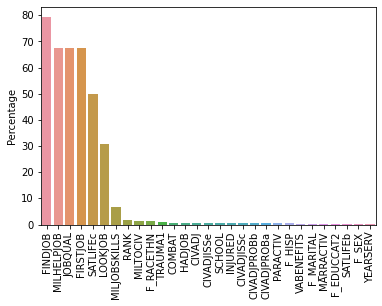

In [207]:
# showing this result in a bar plot
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);

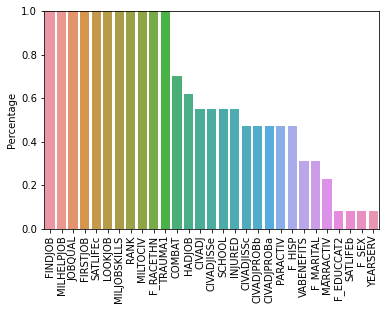

In [208]:
# showing this result in a bar plot with y limited to 1%
# Let's start from columns that have the least missing data(at the right of this plot)
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90)
plt.ylim(0,1);

#### F_EDUCCAT2 - drop rows

In [209]:
# Check missing values in F_EDUCCAT2
df[df['F_EDUCCAT2'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1489,Very Dissatisfied,NaN,< 2 years,NaN,NaN,NaN,No,Not injured,Not too well,NaN,...,No,50-64,Male,NaN,No,White,Never Married,post_911,Army,10000


In [210]:
# This person doesn't answer a lot of questions (11 questions)
# Let's drop this row from df
df.loc[1489].isnull().sum()

11

In [211]:
# Drop this row
df = df.drop(1489,axis=0)

In [212]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1014,79.16
MILHELPJOB,865,67.53
JOBQUAL,864,67.45
FIRSTJOB,863,67.37
SATLIFEc,641,50.04
LOOKJOB,396,30.91
MILJOBSKILLS,83,6.48
RANK,21,1.64
MILTOCIV,17,1.33
F_RACETHN,16,1.25


(0.0, 1.0)

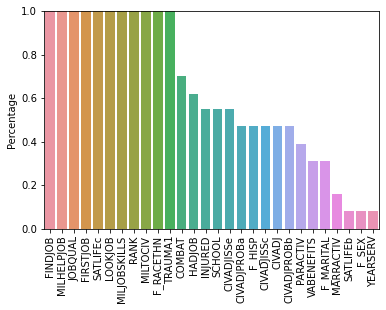

In [213]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### F_SEX - replaced the highest frequency label

In [214]:
# Check the frequency of F_SEX
df['F_SEX'].value_counts()

Male      1103
Female     177
Name: F_SEX, dtype: int64

In [215]:
# Check missing values in F_SEX
df[df['F_SEX'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
2336,Very Satisfied,NaN,3-4 years,O1-O10,Married,Yes,No,Not injured,Not too well,Somewhat difficult,...,Yes,65+,NaN,Bachelors degree,No,White,Divorced/Seperated/Widowed,pre_911,Navy,125000


In [216]:
# There are 6 missing columns
df.loc[2336].isnull().sum()

6

In [217]:
# Although this person has 6 missing value, we can see 4 questions are job related variables
# Other than that, missing data are SATLIFEc and F_SEX
# I filled F_SEX in with the highest frequency label : Male

df.loc[2336]

SATLIFEb                    Very Satisfied
SATLIFEc                               NaN
YEARSERV                         3-4 years
RANK                                O1-O10
MARRACTIV                          Married
PARACTIV                               Yes
COMBAT                                  No
INJURED                        Not injured
MILTOCIV                      Not too well
CIVADJ                  Somewhat difficult
VABENEFITS                              No
CIVADJPROBa                            Yes
CIVADJPROBb                             No
CIVADJISSc                          Seldom
CIVADJISSe                          Seldom
HADJOB                                  No
LOOKJOB                    Yes(right away)
SCHOOL                                  No
MILJOBSKILLS                 fairly useful
FINDJOB                                NaN
JOBQUAL                                NaN
FIRSTJOB                               NaN
MILHELPJOB                             NaN
TRAUMA1    

In [218]:
# Replace with the highest frequency value
df['F_SEX'].fillna(df['F_SEX'].value_counts().idxmax(),inplace=True)

In [219]:
# Check
df.loc[2336]['F_SEX']

'Male'

In [220]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1014,79.16
MILHELPJOB,865,67.53
JOBQUAL,864,67.45
FIRSTJOB,863,67.37
SATLIFEc,641,50.04
LOOKJOB,396,30.91
MILJOBSKILLS,83,6.48
RANK,21,1.64
MILTOCIV,17,1.33
F_RACETHN,16,1.25


(0.0, 1.0)

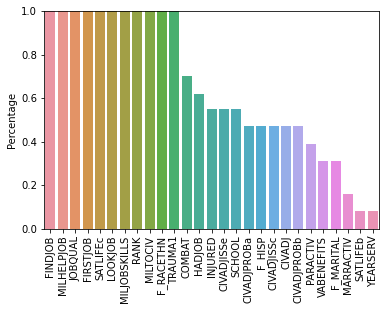

In [221]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### SATLIFEb - fill in values based on related variables

In [222]:
df[df['SATLIFEb'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1759,NaN,NaN,< 2 years,E7-E9,Not Married,No,No,Not injured,Somewhat well,Somewhat Easy,...,No,65+,Male,Some college(no degree),Yes,Asian,Married/Live with a partner,pre_911,Navy,12500


In [223]:
# This person doesn't answer 7 questions, but 4 are for post-911
df.loc[1759].isnull().sum()

7

In [224]:
# The missing data is only SATLIFEb and SATLIFEc
# LOOKJOB is Supposed to be NaN because HADJOB = 'Yes'
df.loc[1759]

SATLIFEb                                NaN
SATLIFEc                                NaN
YEARSERV                          < 2 years
RANK                                  E7-E9
MARRACTIV                       Not Married
PARACTIV                                 No
COMBAT                                   No
INJURED                         Not injured
MILTOCIV                      Somewhat well
CIVADJ                        Somewhat Easy
VABENEFITS                              Yes
CIVADJPROBa                              No
CIVADJPROBb                              No
CIVADJISSc                       Frequently
CIVADJISSe                            Never
HADJOB                                  Yes
LOOKJOB                                 NaN
SCHOOL                                   No
MILJOBSKILLS                    Very useful
FINDJOB                                 NaN
JOBQUAL                                 NaN
FIRSTJOB                                NaN
MILHELPJOB                      

In [225]:
df['SATLIFEb'].value_counts()

Somewhat Satisfied       564
Very Satisfied           423
Somewhat Dissatisfied    208
Very Dissatisfied         85
Name: SATLIFEb, dtype: int64

In [226]:
# Look at this person's stats, CIVADJ and MILTOCIV are well
# we fill in SATLIFEb = 'Somewhat Satisfied'
df['SATLIFEb'].fillna(df['SATLIFEb'].value_counts().idxmax(),inplace=True)

In [227]:
df.loc[1759]['SATLIFEb']

'Somewhat Satisfied'

In [228]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1014,79.16
MILHELPJOB,865,67.53
JOBQUAL,864,67.45
FIRSTJOB,863,67.37
SATLIFEc,641,50.04
LOOKJOB,396,30.91
MILJOBSKILLS,83,6.48
RANK,21,1.64
MILTOCIV,17,1.33
F_RACETHN,16,1.25


(0.0, 1.0)

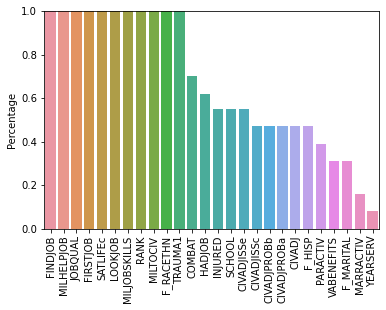

In [229]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### YEARSERV - drop rows

In [230]:
df[df['YEARSERV'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1532,Very Dissatisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50-64,Male,Some college(no degree),No,Black,Married/Live with a partner,pre_911,Marines,31500


In [231]:
# This person doesn't answer 13 quesitons
df.loc[1532].isnull().sum()

14

In [232]:
df.loc[1532]

SATLIFEb                  Very Dissatisfied
SATLIFEc                                NaN
YEARSERV                                NaN
RANK                                    NaN
MARRACTIV                               NaN
PARACTIV                                NaN
COMBAT                                  NaN
INJURED                                 NaN
MILTOCIV                                NaN
CIVADJ                                  NaN
VABENEFITS                              Yes
CIVADJPROBa                             Yes
CIVADJPROBb                              No
CIVADJISSc                           Seldom
CIVADJISSe                        Sometimes
HADJOB                                   No
LOOKJOB                 Yes(Not right away)
SCHOOL                                   No
MILJOBSKILLS                  fairly useful
FINDJOB                                 NaN
JOBQUAL                                 NaN
FIRSTJOB                                NaN
MILHELPJOB                      

In [233]:
# Drop this row
df = df.drop(1532,axis=0)

In [234]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1013,79.14
MILHELPJOB,864,67.50
JOBQUAL,863,67.42
FIRSTJOB,862,67.34
SATLIFEc,640,50.00
LOOKJOB,396,30.94
MILJOBSKILLS,83,6.48
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,16,1.25


(0.0, 1.0)

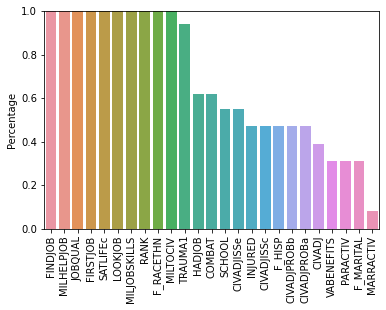

In [235]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### MARRACTIV - drop rows

In [236]:
df[df['MARRACTIV'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
436,Somewhat Dissatisfied,Somewhat Dissatisfied,3-4 years,WO1-WO5,NaN,Yes,No,Not injured,NaN,NaN,...,No,30-49,Male,High school degree,Yes,Asian,Married/Live with a partner,post_911,Air_Force,17500


In [237]:
# This person didn't answer 6 questions, post-911
df.loc[436].isnull().sum()

6

In [238]:
df.loc[436]

SATLIFEb              Somewhat Dissatisfied
SATLIFEc              Somewhat Dissatisfied
YEARSERV                          3-4 years
RANK                                WO1-WO5
MARRACTIV                               NaN
PARACTIV                                Yes
COMBAT                                   No
INJURED                         Not injured
MILTOCIV                                NaN
CIVADJ                                  NaN
VABENEFITS                               No
CIVADJPROBa                             Yes
CIVADJPROBb                             Yes
CIVADJISSc                           Seldom
CIVADJISSe                           Seldom
HADJOB                                  Yes
LOOKJOB                                 NaN
SCHOOL                                  Yes
MILJOBSKILLS                  fairly useful
FINDJOB                                 NaN
JOBQUAL                                 NaN
FIRSTJOB                         < 6 months
MILHELPJOB                      

In [239]:
# Drop this row
df = df.drop(436,axis=0)

In [240]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1012,79.12
MILHELPJOB,864,67.55
FIRSTJOB,862,67.40
JOBQUAL,862,67.40
SATLIFEc,640,50.04
LOOKJOB,395,30.88
MILJOBSKILLS,83,6.49
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,15,1.17


(0.0, 1.0)

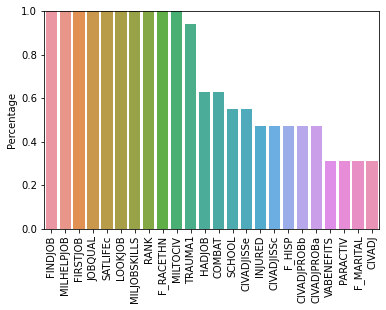

In [241]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### CIVADJ - fill in values based on related variables

In [242]:
df['CIVADJ'].value_counts()

Somewhat Easy         471
Very Easy             426
Somewhat difficult    293
Very difficult         85
Name: CIVADJ, dtype: int64

In [243]:
df[df["CIVADJ"].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
373,Somewhat Satisfied,Somewhat Satisfied,>20 years,E7-E9,Married,NaN,Yes,NaN,NaN,NaN,...,NaN,30-49,Male,Bachelors degree,No,Black,Married/Live with a partner,post_911,Marines,0
1479,Somewhat Dissatisfied,NaN,3-4 years,E1-E6,Not Married,No,Yes,Not injured,Somewhat well,NaN,...,Yes,65+,Male,Associate degree,No,Black,Married/Live with a partner,pre_911,Navy,22500
1510,Somewhat Satisfied,NaN,3-4 years,E7-E9,Married,No,Yes,Not injured,Not too well,NaN,...,No,65+,Male,High school degree,No,White,Married/Live with a partner,pre_911,Marines,7500
1948,Very Satisfied,NaN,3-4 years,E1-E6,Married,NaN,No,Not injured,Somewhat well,NaN,...,No,65+,Male,Some college(no degree),No,Black,Married/Live with a partner,pre_911,Army,17500


In [244]:
# Check whether there are other features could be related to "CIVADJ"
df.columns

Index(['SATLIFEb', 'SATLIFEc', 'YEARSERV', 'RANK', 'MARRACTIV', 'PARACTIV',
       'COMBAT', 'INJURED', 'MILTOCIV', 'CIVADJ', 'VABENEFITS', 'CIVADJPROBa',
       'CIVADJPROBb', 'CIVADJISSc', 'CIVADJISSe', 'HADJOB', 'LOOKJOB',
       'SCHOOL', 'MILJOBSKILLS', 'FINDJOB', 'JOBQUAL', 'FIRSTJOB',
       'MILHELPJOB', 'TRAUMA1', 'F_AGECAT', 'F_SEX', 'F_EDUCCAT2', 'F_HISP',
       'F_RACETHN', 'F_MARITAL', 'Group', 'Branch', 'p_income'],
      dtype='object')

In [245]:
df[['CIVADJ','MILTOCIV']]

,CIVADJ,MILTOCIV
17,Somewhat difficult,Not too well
18,Somewhat difficult,Not too well
25,Somewhat Easy,Not too well
29,Very difficult,Not too well
32,Very Easy,Somewhat well
...,...,...
2366,Very Easy,Not too well
2367,Very Easy,Somewhat well
2368,Very Easy,Somewhat well
2369,Very Easy,Somewhat well


In [246]:
df['MILTOCIV'].value_counts()

Somewhat well      477
Not too well       375
Very well          225
Not well at all    187
Name: MILTOCIV, dtype: int64

In [247]:
# Very well ---> Very Easy
np.round(df[df['MILTOCIV'] == 'Very well']['CIVADJ'].value_counts()/len(df[df['MILTOCIV'] == 'Very well']),2)

Very Easy             0.69
Somewhat Easy         0.22
Somewhat difficult    0.09
Name: CIVADJ, dtype: float64

In [248]:
# Somewhat well ---> Somewhat Easy
np.round(df[df['MILTOCIV'] == 'Somewhat well']['CIVADJ'].value_counts()/len(df[df['MILTOCIV'] == 'Somewhat well']),2)

Somewhat Easy         0.47
Very Easy             0.34
Somewhat difficult    0.17
Very difficult        0.02
Name: CIVADJ, dtype: float64

In [249]:
# Not too well ---> somewhat Easy/somewhat difficult
np.round(df[df['MILTOCIV'] == 'Not too well']['CIVADJ'].value_counts()/len(df[df['MILTOCIV'] == 'Not too well']),2)

Somewhat Easy         0.42
Somewhat difficult    0.34
Very Easy             0.17
Very difficult        0.06
Name: CIVADJ, dtype: float64

In [250]:
# Not well at all ---> Somewhat difficult/ Very difficult
np.round(df[df['MILTOCIV'] == 'Not well at all']['CIVADJ'].value_counts()/len(df[df['MILTOCIV'] == 'Not well at all']),2)


Somewhat difficult    0.31
Very difficult        0.28
Somewhat Easy         0.21
Very Easy             0.20
Name: CIVADJ, dtype: float64

In [251]:
# I used the info above to fill in data
df[df["CIVADJ"].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
373,Somewhat Satisfied,Somewhat Satisfied,>20 years,E7-E9,Married,NaN,Yes,NaN,NaN,NaN,...,NaN,30-49,Male,Bachelors degree,No,Black,Married/Live with a partner,post_911,Marines,0
1479,Somewhat Dissatisfied,NaN,3-4 years,E1-E6,Not Married,No,Yes,Not injured,Somewhat well,NaN,...,Yes,65+,Male,Associate degree,No,Black,Married/Live with a partner,pre_911,Navy,22500
1510,Somewhat Satisfied,NaN,3-4 years,E7-E9,Married,No,Yes,Not injured,Not too well,NaN,...,No,65+,Male,High school degree,No,White,Married/Live with a partner,pre_911,Marines,7500
1948,Very Satisfied,NaN,3-4 years,E1-E6,Married,NaN,No,Not injured,Somewhat well,NaN,...,No,65+,Male,Some college(no degree),No,Black,Married/Live with a partner,pre_911,Army,17500


In [252]:
df['CIVADJ'].unique()

array(['Somewhat difficult', 'Somewhat Easy', 'Very difficult',
       'Very Easy', nan], dtype=object)

In [253]:
S_well = df[(df["CIVADJ"].isnull())&(df['MILTOCIV']=='Somewhat well')]
S_well

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1479,Somewhat Dissatisfied,NaN,3-4 years,E1-E6,Not Married,No,Yes,Not injured,Somewhat well,NaN,...,Yes,65+,Male,Associate degree,No,Black,Married/Live with a partner,pre_911,Navy,22500
1948,Very Satisfied,NaN,3-4 years,E1-E6,Married,NaN,No,Not injured,Somewhat well,NaN,...,No,65+,Male,Some college(no degree),No,Black,Married/Live with a partner,pre_911,Army,17500


In [254]:
df.loc[S_well.index,'CIVADJ'] = 'Somewhat Easy'

In [255]:
# Check
df.loc[S_well.index]['CIVADJ']

1479    Somewhat Easy
1948    Somewhat Easy
Name: CIVADJ, dtype: object

In [256]:
N_well = df[(df["CIVADJ"].isnull())&(df['MILTOCIV']=='Not too well')]
N_well

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1510,Somewhat Satisfied,NaN,3-4 years,E7-E9,Married,No,Yes,Not injured,Not too well,NaN,...,No,65+,Male,High school degree,No,White,Married/Live with a partner,pre_911,Marines,7500


In [257]:
df.loc[N_well.index,'CIVADJ'] = 'Somewhat difficult'

In [258]:
df.loc[N_well.index]['CIVADJ']

1510    Somewhat difficult
Name: CIVADJ, dtype: object

In [259]:
df['CIVADJ'].value_counts()

Somewhat Easy         473
Very Easy             426
Somewhat difficult    294
Very difficult         85
Name: CIVADJ, dtype: int64

In [260]:
# Check row 373, it has a lot of missing values 
# Drop this row
df.loc[373]

SATLIFEb                 Somewhat Satisfied
SATLIFEc                 Somewhat Satisfied
YEARSERV                          >20 years
RANK                                  E7-E9
MARRACTIV                           Married
PARACTIV                                NaN
COMBAT                                  Yes
INJURED                                 NaN
MILTOCIV                                NaN
CIVADJ                                  NaN
VABENEFITS                              NaN
CIVADJPROBa                             NaN
CIVADJPROBb                              No
CIVADJISSc                              NaN
CIVADJISSe                              NaN
HADJOB                                  NaN
LOOKJOB                                 NaN
SCHOOL                                  NaN
MILJOBSKILLS                            NaN
FINDJOB                                 NaN
JOBQUAL                                 NaN
FIRSTJOB                                NaN
MILHELPJOB                      

In [261]:
df = df.drop(373,axis=0)

In [262]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
FIRSTJOB,861,67.37
JOBQUAL,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

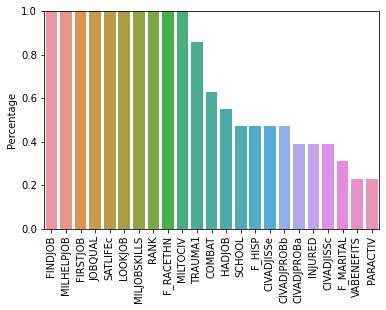

In [263]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### VABENEFITS - fill in values based on proportion

In [264]:
# Most people receive VA benefits (70%)
df['VABENEFITS'].value_counts()

Yes    982
No     293
Name: VABENEFITS, dtype: int64

In [265]:
df[df['VABENEFITS'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
243,Very Satisfied,NaN,>20 years,O1-O10,Married,Yes,Yes,Not injured,Very well,Very Easy,...,No,65+,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Muti-Branch,0
1418,Somewhat Satisfied,NaN,3-4 years,E7-E9,Married,Yes,Yes,Not injured,Somewhat well,Somewhat difficult,...,NaN,65+,Male,Associate degree,No,NaN,Married/Live with a partner,pre_911,Army,22500
1581,Somewhat Satisfied,NaN,10-19 years,E7-E9,Married,Yes,Yes,Injured in combat,Not well at all,Somewhat difficult,...,Yes,65+,Male,Some college(no degree),No,White,Married/Live with a partner,pre_911,Army,31500


In [266]:
# Randomly select 2 rows of missing data
B_yes = df[df['VABENEFITS'].isnull()].sample(n=2,random_state=101)
B_yes

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1581,Somewhat Satisfied,NaN,10-19 years,E7-E9,Married,Yes,Yes,Injured in combat,Not well at all,Somewhat difficult,...,Yes,65+,Male,Some college(no degree),No,White,Married/Live with a partner,pre_911,Army,31500
243,Very Satisfied,NaN,>20 years,O1-O10,Married,Yes,Yes,Not injured,Very well,Very Easy,...,No,65+,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Muti-Branch,0


In [267]:
# Assign these rows to Yes 
df.loc[B_yes.index,'VABENEFITS'] = 'Yes'

In [268]:
# Assign the last row to No
df.loc[1418,'VABENEFITS'] = 'No'

In [269]:
# Check
df.loc[[1418,1581,243]]['VABENEFITS']

1418     No
1581    Yes
243     Yes
Name: VABENEFITS, dtype: object

In [270]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
FIRSTJOB,861,67.37
JOBQUAL,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

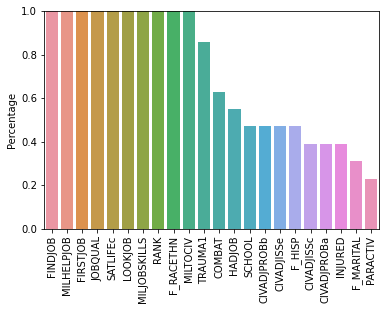

In [271]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### PARACTIV - replaced with the highest frequency label

In [272]:
# Most people has no kids
df['PARACTIV'].value_counts()

No     800
Yes    475
Name: PARACTIV, dtype: int64

In [273]:
df[df['PARACTIV'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
739,Somewhat Dissatisfied,Somewhat Satisfied,5-9 years,E1-E6,Married,NaN,Yes,Not injured,Not too well,Very difficult,...,Yes,30-49,Male,Some college(no degree),No,White,Married/Live with a partner,post_911,Army,31500
1948,Very Satisfied,NaN,3-4 years,E1-E6,Married,NaN,No,Not injured,Somewhat well,Somewhat Easy,...,No,65+,Male,Some college(no degree),No,Black,Married/Live with a partner,pre_911,Army,17500
2247,Very Satisfied,Very Satisfied,3-4 years,E1-E6,Not Married,NaN,No,Not injured,Very well,Somewhat Easy,...,No,50-64,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,pre_911,Army,10000


In [274]:
n_index = df[df['PARACTIV'].isnull()].index
n_index

Int64Index([739, 1948, 2247], dtype='int64')

In [275]:
# I filled in with the highest frequency option "No" 
# inplace :
# If True, fill in-place. Note: this will modify any other views on this object
df['PARACTIV'].fillna(df['PARACTIV'].value_counts().idxmax(),inplace=True)

In [276]:
df.loc[n_index]['PARACTIV']

739     No
1948    No
2247    No
Name: PARACTIV, dtype: object

In [277]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
FIRSTJOB,861,67.37
JOBQUAL,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

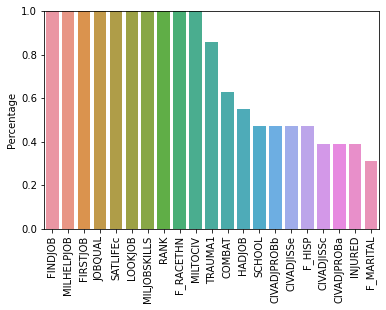

In [278]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### F_MARITAL - replaced with the highest frequency label

In [279]:
# Remember, some of the rows are dropped already
# That's why this number doesn't match with above
df['F_MARITAL'].value_counts()

Married/Live with a partner    907
Divorced/Seperated/Widowed     278
Never Married                   89
Name: F_MARITAL, dtype: int64

In [280]:
df[df['F_MARITAL'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1391,Somewhat Satisfied,NaN,3-4 years,E1-E6,Not Married,No,No,Not injured,Somewhat well,Very Easy,...,No,65+,Female,High school degree,No,White,NaN,pre_911,Army,0
1434,Very Dissatisfied,NaN,3-4 years,E1-E6,Not Married,No,Yes,Injured in combat,Not well at all,Very difficult,...,Yes,65+,Female,Some college(no degree),No,White,NaN,pre_911,Marines,0
2027,Very Satisfied,Very Satisfied,10-19 years,O1-O10,Married,No,No,Not injured,Not well at all,Somewhat Easy,...,No,50-64,Male,Bachelors degree,No,White,NaN,pre_911,Army,150000
2248,Very Satisfied,Very Satisfied,5-9 years,O1-O10,Married,No,No,Not injured,Somewhat well,Very Easy,...,No,30-49,Male,MS/PHD degree,No,White,NaN,post_911,Navy,150000


In [281]:
n_index_m = df[df['F_MARITAL'].isnull()].index
n_index_m

Int64Index([1391, 1434, 2027, 2248], dtype='int64')

In [282]:
# Replace these rows with the highest frequency "Married/Live with a partner"
df['F_MARITAL'].fillna(df['F_MARITAL'].value_counts().idxmax(),inplace=True)

In [283]:
# Check
df.loc[n_index_m]['F_MARITAL']

1391    Married/Live with a partner
1434    Married/Live with a partner
2027    Married/Live with a partner
2248    Married/Live with a partner
Name: F_MARITAL, dtype: object

In [284]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
FIRSTJOB,861,67.37
JOBQUAL,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

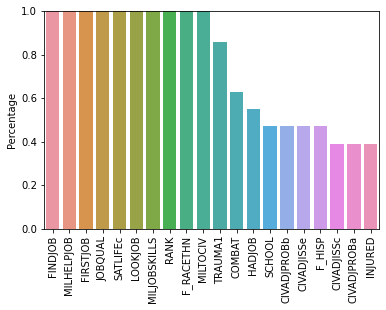

In [285]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### INJURED - replaced with the highest frequency label

In [286]:
# Most people are not injured
df['INJURED'].value_counts()

Not injured              1029
Injured out of combat     187
Injured in combat          57
Name: INJURED, dtype: int64

In [287]:
df[df['INJURED'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1166,Somewhat Satisfied,NaN,5-9 years,E7-E9,Married,Yes,Yes,NaN,Not too well,Somewhat Easy,...,Yes,30-49,Male,Bachelors degree,Yes,Asian,Married/Live with a partner,post_911,Army,0
1217,Somewhat Satisfied,NaN,>20 years,E7-E9,Married,No,Yes,NaN,Somewhat well,Somewhat difficult,...,Yes,50-64,Male,Some college(no degree),No,White,Married/Live with a partner,post_911,Air_Force,31500
2077,Somewhat Dissatisfied,NaN,< 2 years,E1-E6,Not Married,No,NaN,NaN,Somewhat well,Somewhat difficult,...,Yes,30-49,Male,Associate degree,No,Mixed race,Divorced/Seperated/Widowed,pre_911,Army,35000
2254,Somewhat Satisfied,NaN,3-4 years,E7-E9,Not Married,No,Yes,NaN,Not well at all,Somewhat difficult,...,Yes,65+,Male,Some college(no degree),No,White,Divorced/Seperated/Widowed,pre_911,Air_Force,15000
2312,Very Satisfied,Very Satisfied,< 2 years,E7-E9,Married,No,NaN,NaN,Not well at all,Very Easy,...,Yes,65+,Male,MS/PHD degree,No,White,Divorced/Seperated/Widowed,pre_911,Army,150000


In [288]:
n_index_i = df[df['INJURED'].isnull()].index

In [289]:
# Replace these rows with the highest frequency "Not injured"
df['INJURED'].fillna(df['INJURED'].value_counts().idxmax(),inplace=True)

In [290]:
# Check
df.loc[n_index_i]['INJURED']

1166    Not injured
1217    Not injured
2077    Not injured
2254    Not injured
2312    Not injured
Name: INJURED, dtype: object

In [291]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
FIRSTJOB,861,67.37
JOBQUAL,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

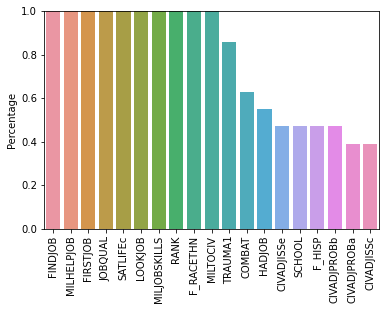

In [292]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### CIVADJISSc - fill in values based on related variables
After few years, how often you feel optimistic about future

In [293]:
df['CIVADJISSc'].value_counts()

Frequently    637
Sometimes     462
Seldom        120
Never          54
Name: CIVADJISSc, dtype: int64

In [294]:
df[df['CIVADJISSc'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1419,Somewhat Satisfied,Somewhat Dissatisfied,< 2 years,NaN,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,Yes,30-49,Female,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Army,75000
1595,Very Satisfied,NaN,< 2 years,E1-E6,Not Married,No,No,Not injured,Somewhat well,Very Easy,...,NaN,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
1639,Somewhat Dissatisfied,Very Dissatisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,Not well at all,Very difficult,...,NaN,30-49,Male,High school degree,Yes,Asian,Married/Live with a partner,post_911,Marines,17500
2083,Somewhat Satisfied,Somewhat Satisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,Somewhat well,Somewhat difficult,...,No,50-64,Male,Associate degree,No,White,Divorced/Seperated/Widowed,pre_911,Navy,63000
2218,Somewhat Dissatisfied,NaN,3-4 years,E7-E9,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,NaN,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Navy,22500


In [295]:
df.columns

Index(['SATLIFEb', 'SATLIFEc', 'YEARSERV', 'RANK', 'MARRACTIV', 'PARACTIV',
       'COMBAT', 'INJURED', 'MILTOCIV', 'CIVADJ', 'VABENEFITS', 'CIVADJPROBa',
       'CIVADJPROBb', 'CIVADJISSc', 'CIVADJISSe', 'HADJOB', 'LOOKJOB',
       'SCHOOL', 'MILJOBSKILLS', 'FINDJOB', 'JOBQUAL', 'FIRSTJOB',
       'MILHELPJOB', 'TRAUMA1', 'F_AGECAT', 'F_SEX', 'F_EDUCCAT2', 'F_HISP',
       'F_RACETHN', 'F_MARITAL', 'Group', 'Branch', 'p_income'],
      dtype='object')

In [296]:
df['CIVADJ'].value_counts()

Somewhat Easy         473
Very Easy             426
Somewhat difficult    294
Very difficult         85
Name: CIVADJ, dtype: int64

In [297]:
# Somewhat Easy --> Frequently
df[df['CIVADJ'] == 'Somewhat Easy']['CIVADJISSc'].value_counts()

Frequently    227
Sometimes     188
Seldom         39
Never          19
Name: CIVADJISSc, dtype: int64

In [298]:
# Very Easy --> Frequently
df[df['CIVADJ'] == 'Very Easy']['CIVADJISSc'].value_counts()

Frequently    321
Sometimes      77
Never          18
Seldom          9
Name: CIVADJISSc, dtype: int64

In [299]:
# Somewhat difficult --> Sometimes
df[df['CIVADJ'] == 'Somewhat difficult']['CIVADJISSc'].value_counts()

Sometimes     164
Frequently     76
Seldom         42
Never           9
Name: CIVADJISSc, dtype: int64

In [300]:
# Very difficult --> Sometime/Seldom 
# People who had tough time to adjust to civilian life are sometimes/seldom optimistic
df[df['CIVADJ'] == 'Very difficult']['CIVADJISSc'].value_counts()

Sometimes     33
Seldom        30
Frequently    13
Never          8
Name: CIVADJISSc, dtype: int64

In [301]:
df[df['CIVADJISSc'].isnull()][['CIVADJ','CIVADJISSc']]

,CIVADJ,CIVADJISSc
1419,Somewhat difficult,NaN
1595,Very Easy,NaN
1639,Very difficult,NaN
2083,Somewhat difficult,NaN
2218,Somewhat difficult,NaN


In [302]:
df.loc[[1419,2083,2218],'CIVADJISSc'] = 'Sometimes'

In [303]:
df.loc[1595,'CIVADJISSc'] = 'Frequently'

In [304]:
df.loc[1639,'CIVADJISSc'] = 'Seldom'

In [305]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
FIRSTJOB,861,67.37
JOBQUAL,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

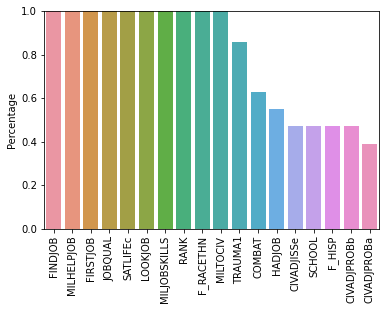

In [306]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### CIVADJPROBa - replaced with the highest frequency label

In [307]:
# Most people don't have trouble paying bills
df['CIVADJPROBa'].value_counts()

No     852
Yes    421
Name: CIVADJPROBa, dtype: int64

In [308]:
df[df['CIVADJPROBa'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
318,Somewhat Satisfied,Very Satisfied,>20 years,E7-E9,Married,Yes,Yes,Not injured,Very well,Somewhat Easy,...,NaN,50-64,Male,Associate degree,No,Black,Married/Live with a partner,post_911,Army,31500
1639,Somewhat Dissatisfied,Very Dissatisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,Not well at all,Very difficult,...,NaN,30-49,Male,High school degree,Yes,Asian,Married/Live with a partner,post_911,Marines,17500
2083,Somewhat Satisfied,Somewhat Satisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,Somewhat well,Somewhat difficult,...,No,50-64,Male,Associate degree,No,White,Divorced/Seperated/Widowed,pre_911,Navy,63000
2133,Somewhat Satisfied,Very Satisfied,< 2 years,E7-E9,Married,No,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,Some college(no degree),No,White,Married/Live with a partner,pre_911,Army,0
2218,Somewhat Dissatisfied,NaN,3-4 years,E7-E9,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,NaN,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Navy,22500


In [309]:
n_index_c = df[df['CIVADJPROBa'].isnull()].index
n_index_c

Int64Index([318, 1639, 2083, 2133, 2218], dtype='int64')

In [310]:
# Replace with the highest frequency option
df['CIVADJPROBa'].fillna(df['CIVADJPROBa'].value_counts().idxmax(),inplace=True)

In [311]:
# Check
df.loc[n_index_c]['CIVADJPROBa']

318     No
1639    No
2083    No
2133    No
2218    No
Name: CIVADJPROBa, dtype: object

In [312]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
FIRSTJOB,861,67.37
JOBQUAL,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

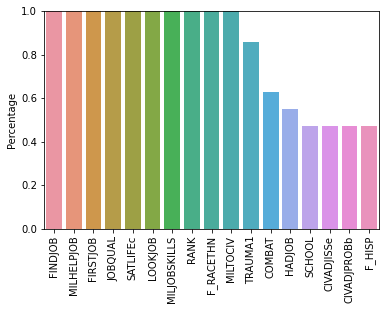

In [313]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### SCHOOL - replaced with the highest frequency label

In [314]:
# Most People go to school
df['SCHOOL'].value_counts()

Yes    694
No     578
Name: SCHOOL, dtype: int64

In [315]:
df[df['SCHOOL'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1418,Somewhat Satisfied,NaN,3-4 years,E7-E9,Married,Yes,Yes,Not injured,Somewhat well,Somewhat difficult,...,NaN,65+,Male,Associate degree,No,NaN,Married/Live with a partner,pre_911,Army,22500
1595,Very Satisfied,NaN,< 2 years,E1-E6,Not Married,No,No,Not injured,Somewhat well,Very Easy,...,NaN,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
1639,Somewhat Dissatisfied,Very Dissatisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,Not well at all,Very difficult,...,NaN,30-49,Male,High school degree,Yes,Asian,Married/Live with a partner,post_911,Marines,17500
2167,Very Satisfied,NaN,< 2 years,NaN,Married,No,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Army,44000
2218,Somewhat Dissatisfied,NaN,3-4 years,E7-E9,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,NaN,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Navy,22500
2219,Somewhat Satisfied,NaN,< 2 years,O1-O10,Married,Yes,No,Not injured,Somewhat well,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,75000


In [316]:
n_index_s = df[df['SCHOOL'].isnull()].index
n_index_s

Int64Index([1418, 1595, 1639, 2167, 2218, 2219], dtype='int64')

In [317]:
# Replace with the highest frequency option "Yes"
df['SCHOOL'].fillna(df['SCHOOL'].value_counts().idxmax(),inplace=True)

In [318]:
df.loc[n_index_s]['SCHOOL']

1418    Yes
1595    Yes
1639    Yes
2167    Yes
2218    Yes
2219    Yes
Name: SCHOOL, dtype: object

In [319]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
FIRSTJOB,861,67.37
JOBQUAL,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

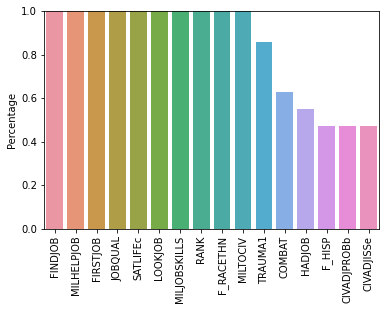

In [320]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### F_HISP - replaced with the highest frequency label

In [321]:
df['F_HISP'].value_counts()

No     1159
Yes     113
Name: F_HISP, dtype: int64

In [322]:
df[df['F_HISP'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1444,Very Satisfied,Somewhat Satisfied,5-9 years,E1-E6,Married,Yes,No,Injured out of combat,Very well,Somewhat Easy,...,Yes,30-49,Male,Bachelors degree,NaN,Mixed race,Married/Live with a partner,pre_911,Navy,44000
1467,Very Satisfied,NaN,< 2 years,O1-O10,Married,No,No,Not injured,Not too well,Very Easy,...,No,65+,Male,MS/PHD degree,NaN,NaN,Married/Live with a partner,pre_911,Army,44000
1991,Very Satisfied,Somewhat Satisfied,3-4 years,E7-E9,Married,No,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,MS/PHD degree,NaN,NaN,Divorced/Seperated/Widowed,pre_911,Air_Force,45000
2063,Very Satisfied,NaN,5-9 years,E7-E9,Not Married,No,Yes,Not injured,Very well,Very Easy,...,No,65+,Male,MS/PHD degree,NaN,White,Married/Live with a partner,pre_911,Air_Force,0
2255,Very Satisfied,NaN,3-4 years,E7-E9,Not Married,No,Yes,Not injured,Not too well,Very Easy,...,No,65+,Male,Some college(no degree),NaN,NaN,Married/Live with a partner,pre_911,Air_Force,0
2311,Very Satisfied,NaN,< 2 years,E7-E9,Not Married,No,Yes,Injured in combat,Not well at all,Very difficult,...,Yes,65+,Male,Associate degree,NaN,NaN,Married/Live with a partner,pre_911,Army,31500


In [323]:
n_index_h = df[df['F_HISP'].isnull()].index
n_index_h

Int64Index([1444, 1467, 1991, 2063, 2255, 2311], dtype='int64')

In [324]:
# Replace with the highest frequency option "No"
df['F_HISP'].fillna(df['F_HISP'].value_counts().idxmax(),inplace=True)

In [325]:
# Check 
df.loc[n_index_h]['F_HISP']

1444    No
1467    No
1991    No
2063    No
2255    No
2311    No
Name: F_HISP, dtype: object

In [326]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
FIRSTJOB,861,67.37
JOBQUAL,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

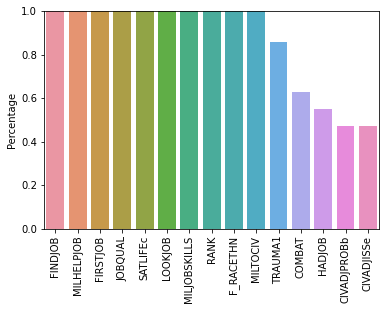

In [327]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### CIVADJISSe - fill in values based on related variables
Having difficulty dealing with the lack of structure in civilian life 

In [328]:
df['CIVADJISSe'].value_counts()

Never         511
Sometimes     318
Seldom        304
Frequently    139
Name: CIVADJISSe, dtype: int64

In [329]:
df[df['CIVADJISSe'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1419,Somewhat Satisfied,Somewhat Dissatisfied,< 2 years,NaN,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,Yes,30-49,Female,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Army,75000
1581,Somewhat Satisfied,NaN,10-19 years,E7-E9,Married,Yes,Yes,Injured in combat,Not well at all,Somewhat difficult,...,Yes,65+,Male,Some college(no degree),No,White,Married/Live with a partner,pre_911,Army,31500
1595,Very Satisfied,NaN,< 2 years,E1-E6,Not Married,No,No,Not injured,Somewhat well,Very Easy,...,NaN,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
1639,Somewhat Dissatisfied,Very Dissatisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,Not well at all,Very difficult,...,NaN,30-49,Male,High school degree,Yes,Asian,Married/Live with a partner,post_911,Marines,17500
2083,Somewhat Satisfied,Somewhat Satisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,Somewhat well,Somewhat difficult,...,No,50-64,Male,Associate degree,No,White,Divorced/Seperated/Widowed,pre_911,Navy,63000
2218,Somewhat Dissatisfied,NaN,3-4 years,E7-E9,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,NaN,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Navy,22500


In [330]:
df['CIVADJ'].unique()

array(['Somewhat difficult', 'Somewhat Easy', 'Very difficult',
       'Very Easy'], dtype=object)

In [331]:
# Very Easy ---> Never
df[df['CIVADJ'] == 'Very Easy']['CIVADJISSe'].value_counts()

Never         305
Seldom         74
Sometimes      42
Frequently      4
Name: CIVADJISSe, dtype: int64

In [332]:
# Somewhat Easy ---> Seldom
df[df['CIVADJ'] == 'Somewhat Easy']['CIVADJISSe'].value_counts()

Seldom        176
Never         163
Sometimes     116
Frequently     18
Name: CIVADJISSe, dtype: int64

In [333]:
# Somewhat difficult ---> Sometimes
df[df['CIVADJ'] == 'Somewhat difficult']['CIVADJISSe'].value_counts()

Sometimes     131
Frequently     66
Seldom         51
Never          42
Name: CIVADJISSe, dtype: int64

In [334]:
# Very difficult ---> Frequently
df[df['CIVADJ'] == 'Very difficult']['CIVADJISSe'].value_counts()

Frequently    51
Sometimes     29
Seldom         3
Never          1
Name: CIVADJISSe, dtype: int64

In [335]:
df[df['CIVADJISSe'].isnull()][['CIVADJ','CIVADJISSe']]

,CIVADJ,CIVADJISSe
1419,Somewhat difficult,NaN
1581,Somewhat difficult,NaN
1595,Very Easy,NaN
1639,Very difficult,NaN
2083,Somewhat difficult,NaN
2218,Somewhat difficult,NaN


In [336]:
df.loc[[1419,1581,2083,2218],'CIVADJISSe'] = 'Sometimes'

In [337]:
df.loc[1595,'CIVADJISSe'] = 'Never'

In [338]:
df.loc[1639,'CIVADJISSe'] = 'Frequently'

In [339]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
JOBQUAL,861,67.37
FIRSTJOB,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

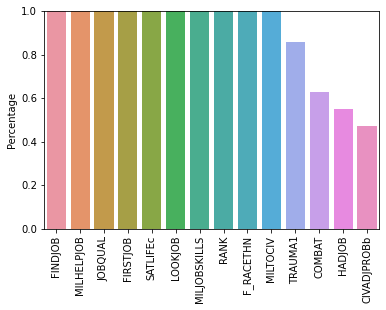

In [340]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### CIVADJPROBb - replaced with the highest frequency label
Did you ever receive food benefits from the government

In [341]:
# Most people don't receive food benefits
df['CIVADJPROBb'].value_counts()

No     1142
Yes     130
Name: CIVADJPROBb, dtype: int64

In [342]:
df[df['CIVADJPROBb'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1385,Very Satisfied,NaN,3-4 years,E1-E6,Not Married,No,No,Not injured,Somewhat well,Somewhat Easy,...,No,65+,Male,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Air_Force,0
1639,Somewhat Dissatisfied,Very Dissatisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,Not well at all,Very difficult,...,NaN,30-49,Male,High school degree,Yes,Asian,Married/Live with a partner,post_911,Marines,17500
1802,Somewhat Satisfied,Somewhat Satisfied,3-4 years,E1-E6,Not Married,No,No,Injured out of combat,NaN,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,0
1881,Very Satisfied,Somewhat Satisfied,5-9 years,E7-E9,Married,No,NaN,Not injured,Not well at all,Somewhat Easy,...,Yes,50-64,Male,Bachelors degree,Yes,Asian,Married/Live with a partner,pre_911,Navy,75000
2105,Somewhat Satisfied,NaN,3-4 years,E7-E9,Not Married,No,No,Not injured,Very well,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Air_Force,31500
2218,Somewhat Dissatisfied,NaN,3-4 years,E7-E9,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,NaN,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Navy,22500


In [343]:
n_index_cb = df[df['CIVADJPROBb'].isnull()].index
n_index_cb

Int64Index([1385, 1639, 1802, 1881, 2105, 2218], dtype='int64')

In [344]:
# Replace with the highest frequency option "No"
df['CIVADJPROBb'].fillna(df['CIVADJPROBb'].value_counts().idxmax(),inplace=True)

In [345]:
df.loc[n_index_cb]['CIVADJPROBb']

1385    No
1639    No
1802    No
1881    No
2105    No
2218    No
Name: CIVADJPROBb, dtype: object

In [346]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
JOBQUAL,861,67.37
FIRSTJOB,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

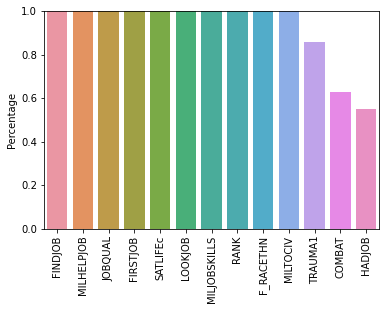

In [347]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### COMBAT - fill in values based on proportion

In [348]:
# Almost 60% and 40% split
df['COMBAT'].value_counts()

No     731
Yes    539
Name: COMBAT, dtype: int64

In [349]:
# We split 8 to 5(No) and 3(Yes), Let's randomly choose who is yes or no
# Vaterans served in Marines and Army are more likely be in combat
df[df['COMBAT'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
920,Very Satisfied,NaN,>20 years,E7-E9,Married,Yes,NaN,Not injured,Somewhat well,Somewhat Easy,...,Yes,50-64,Male,Bachelors degree,No,Black,Divorced/Seperated/Widowed,post_911,Marines,88000
1524,Somewhat Satisfied,Somewhat Satisfied,3-4 years,E1-E6,Not Married,No,NaN,Not injured,Not well at all,Very Easy,...,NaN,50-64,Male,Associate degree,No,White,Married/Live with a partner,pre_911,Army,62500
1629,Very Satisfied,NaN,>20 years,O1-O10,Married,Yes,NaN,Not injured,Not too well,Somewhat Easy,...,Yes,65+,Male,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Air_Force,0
1881,Very Satisfied,Somewhat Satisfied,5-9 years,E7-E9,Married,No,NaN,Not injured,Not well at all,Somewhat Easy,...,Yes,50-64,Male,Bachelors degree,Yes,Asian,Married/Live with a partner,pre_911,Navy,75000
2077,Somewhat Dissatisfied,NaN,< 2 years,E1-E6,Not Married,No,NaN,Not injured,Somewhat well,Somewhat difficult,...,Yes,30-49,Male,Associate degree,No,Mixed race,Divorced/Seperated/Widowed,pre_911,Army,35000
2109,Somewhat Satisfied,NaN,< 2 years,O1-O10,Married,No,NaN,Not injured,Very well,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
2216,Very Dissatisfied,Very Dissatisfied,3-4 years,E1-E6,Not Married,No,NaN,Injured in combat,Not well at all,Very difficult,...,Yes,18-29,Male,Some college(no degree),No,White,Never Married,post_911,Army,10000
2312,Very Satisfied,Very Satisfied,< 2 years,E7-E9,Married,No,NaN,Not injured,Not well at all,Very Easy,...,Yes,65+,Male,MS/PHD degree,No,White,Divorced/Seperated/Widowed,pre_911,Army,150000


In [350]:
df[(df['COMBAT'].isnull())& (df['Branch']=='Army')]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1524,Somewhat Satisfied,Somewhat Satisfied,3-4 years,E1-E6,Not Married,No,NaN,Not injured,Not well at all,Very Easy,...,NaN,50-64,Male,Associate degree,No,White,Married/Live with a partner,pre_911,Army,62500
2077,Somewhat Dissatisfied,NaN,< 2 years,E1-E6,Not Married,No,NaN,Not injured,Somewhat well,Somewhat difficult,...,Yes,30-49,Male,Associate degree,No,Mixed race,Divorced/Seperated/Widowed,pre_911,Army,35000
2109,Somewhat Satisfied,NaN,< 2 years,O1-O10,Married,No,NaN,Not injured,Very well,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
2216,Very Dissatisfied,Very Dissatisfied,3-4 years,E1-E6,Not Married,No,NaN,Injured in combat,Not well at all,Very difficult,...,Yes,18-29,Male,Some college(no degree),No,White,Never Married,post_911,Army,10000
2312,Very Satisfied,Very Satisfied,< 2 years,E7-E9,Married,No,NaN,Not injured,Not well at all,Very Easy,...,Yes,65+,Male,MS/PHD degree,No,White,Divorced/Seperated/Widowed,pre_911,Army,150000


In [351]:
df[(df['COMBAT'].isnull())& (df['Branch']=='Marines')]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
920,Very Satisfied,NaN,>20 years,E7-E9,Married,Yes,NaN,Not injured,Somewhat well,Somewhat Easy,...,Yes,50-64,Male,Bachelors degree,No,Black,Divorced/Seperated/Widowed,post_911,Marines,88000


In [352]:
army_index = df[(df['COMBAT'].isnull())& (df['Branch']=='Army')].sample(n=2,random_state=101).index
army_index

Int64Index([1524, 2312], dtype='int64')

In [353]:
df.loc[[920,1524,2312],'COMBAT'] = 'Yes'

In [354]:
df.loc[[920,1524,2312]]['COMBAT']

920     Yes
1524    Yes
2312    Yes
Name: COMBAT, dtype: object

In [355]:
df[df['COMBAT'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1629,Very Satisfied,NaN,>20 years,O1-O10,Married,Yes,NaN,Not injured,Not too well,Somewhat Easy,...,Yes,65+,Male,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Air_Force,0
1881,Very Satisfied,Somewhat Satisfied,5-9 years,E7-E9,Married,No,NaN,Not injured,Not well at all,Somewhat Easy,...,Yes,50-64,Male,Bachelors degree,Yes,Asian,Married/Live with a partner,pre_911,Navy,75000
2077,Somewhat Dissatisfied,NaN,< 2 years,E1-E6,Not Married,No,NaN,Not injured,Somewhat well,Somewhat difficult,...,Yes,30-49,Male,Associate degree,No,Mixed race,Divorced/Seperated/Widowed,pre_911,Army,35000
2109,Somewhat Satisfied,NaN,< 2 years,O1-O10,Married,No,NaN,Not injured,Very well,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
2216,Very Dissatisfied,Very Dissatisfied,3-4 years,E1-E6,Not Married,No,NaN,Injured in combat,Not well at all,Very difficult,...,Yes,18-29,Male,Some college(no degree),No,White,Never Married,post_911,Army,10000


In [356]:
# Replace with the highest frequency option "No"
df['COMBAT'].fillna(df['COMBAT'].value_counts().idxmax(),inplace=True)

In [357]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
JOBQUAL,861,67.37
FIRSTJOB,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

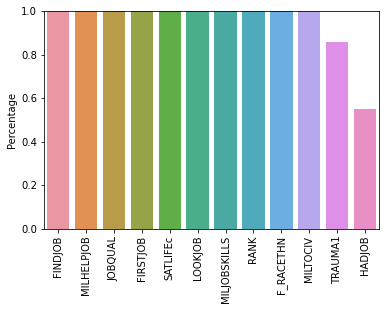

In [358]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### TRAUMA1 - fill in values based on proportion

In [359]:
# Most people don't have trauma
# No : 64%, Yes : 36%
df['TRAUMA1'].value_counts()

No     815
Yes    452
Name: TRAUMA1, dtype: int64

In [360]:
# Veterans who were in combat have equal chance to have or not have trauma
df[df['COMBAT'] == 'Yes']['TRAUMA1'].value_counts()

Yes    272
No     263
Name: TRAUMA1, dtype: int64

In [361]:
# Here I decided to assign Yes/No randomly to NaN rows based on proportion
df[df['TRAUMA1'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
318,Somewhat Satisfied,Very Satisfied,>20 years,E7-E9,Married,Yes,Yes,Not injured,Very well,Somewhat Easy,...,NaN,50-64,Male,Associate degree,No,Black,Married/Live with a partner,post_911,Army,31500
641,Somewhat Satisfied,NaN,3-4 years,E1-E6,Married,Yes,Yes,Injured out of combat,Not too well,Somewhat difficult,...,NaN,65+,Female,Some college(no degree),No,White,Divorced/Seperated/Widowed,post_911,Navy,35000
1418,Somewhat Satisfied,NaN,3-4 years,E7-E9,Married,Yes,Yes,Not injured,Somewhat well,Somewhat difficult,...,NaN,65+,Male,Associate degree,No,NaN,Married/Live with a partner,pre_911,Army,22500
1456,Very Dissatisfied,NaN,3-4 years,E7-E9,Married,Yes,No,Not injured,Somewhat well,Somewhat Easy,...,NaN,50-64,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
1462,Somewhat Satisfied,Somewhat Satisfied,10-19 years,E1-E6,Not Married,Yes,Yes,Injured out of combat,Somewhat well,Very Easy,...,NaN,30-49,Female,Some college(no degree),No,Black,Never Married,pre_911,Navy,45000
1524,Somewhat Satisfied,Somewhat Satisfied,3-4 years,E1-E6,Not Married,No,Yes,Not injured,Not well at all,Very Easy,...,NaN,50-64,Male,Associate degree,No,White,Married/Live with a partner,pre_911,Army,62500
1595,Very Satisfied,NaN,< 2 years,E1-E6,Not Married,No,No,Not injured,Somewhat well,Very Easy,...,NaN,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
1639,Somewhat Dissatisfied,Very Dissatisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,Not well at all,Very difficult,...,NaN,30-49,Male,High school degree,Yes,Asian,Married/Live with a partner,post_911,Marines,17500
2150,Somewhat Satisfied,Somewhat Satisfied,5-9 years,E1-E6,Married,Yes,Yes,Not injured,Very well,Very Easy,...,NaN,30-49,Male,High school degree,No,White,Married/Live with a partner,post_911,Army,22500
2218,Somewhat Dissatisfied,NaN,3-4 years,E7-E9,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,NaN,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Navy,22500


In [362]:
# Let's assign 7 to No and 4 to Yes
# .sample() randomly select rows in dataframe
trauma_no = df[df['TRAUMA1'].isnull()].sample(n=7, random_state=101)
trauma_no

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1418,Somewhat Satisfied,NaN,3-4 years,E7-E9,Married,Yes,Yes,Not injured,Somewhat well,Somewhat difficult,...,NaN,65+,Male,Associate degree,No,NaN,Married/Live with a partner,pre_911,Army,22500
2150,Somewhat Satisfied,Somewhat Satisfied,5-9 years,E1-E6,Married,Yes,Yes,Not injured,Very well,Very Easy,...,NaN,30-49,Male,High school degree,No,White,Married/Live with a partner,post_911,Army,22500
2218,Somewhat Dissatisfied,NaN,3-4 years,E7-E9,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,NaN,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Navy,22500
1462,Somewhat Satisfied,Somewhat Satisfied,10-19 years,E1-E6,Not Married,Yes,Yes,Injured out of combat,Somewhat well,Very Easy,...,NaN,30-49,Female,Some college(no degree),No,Black,Never Married,pre_911,Navy,45000
318,Somewhat Satisfied,Very Satisfied,>20 years,E7-E9,Married,Yes,Yes,Not injured,Very well,Somewhat Easy,...,NaN,50-64,Male,Associate degree,No,Black,Married/Live with a partner,post_911,Army,31500
2252,Somewhat Satisfied,Very Satisfied,3-4 years,E7-E9,Not Married,No,Yes,Not injured,Not too well,Somewhat Easy,...,NaN,65+,Male,Some college(no degree),No,White,Married/Live with a partner,pre_911,Marines,62500
1456,Very Dissatisfied,NaN,3-4 years,E7-E9,Married,Yes,No,Not injured,Somewhat well,Somewhat Easy,...,NaN,50-64,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500


In [363]:
trauma_no.index

Int64Index([1418, 2150, 2218, 1462, 318, 2252, 1456], dtype='int64')

In [364]:
df.loc[trauma_no.index,'TRAUMA1'] ='No'

In [365]:
# These are the remain NaN value should be filled with "Yes"
df[df['TRAUMA1'].isnull()].index

Int64Index([641, 1524, 1595, 1639], dtype='int64')

In [366]:
df.loc[df[df['TRAUMA1'].isnull()].index,'TRAUMA1']= 'Yes'

In [367]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1011,79.11
MILHELPJOB,863,67.53
JOBQUAL,861,67.37
FIRSTJOB,861,67.37
SATLIFEc,640,50.08
LOOKJOB,394,30.83
MILJOBSKILLS,82,6.42
RANK,20,1.56
F_RACETHN,16,1.25
MILTOCIV,14,1.10


(0.0, 1.0)

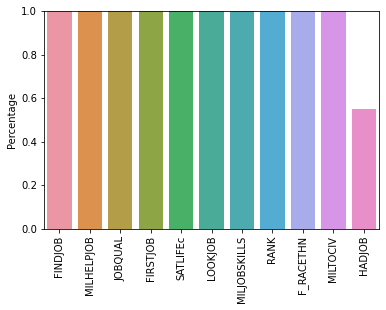

In [368]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### RANK - fill in values based on related variables

In [369]:
# There are 20 rows of NaN values
df['RANK'].value_counts(dropna=False)

E1-E6      548
E7-E9      452
O1-O10     241
NaN         20
WO1-WO5     17
Name: RANK, dtype: int64

In [370]:
no_rank = df[df['RANK'].isnull()]

In [371]:
# Let's deal with people who have served >20 years
# From the education level and YEARSERV 
# If served >20 years, the person's rank can be E7-E9, WO1-W5, or O1-O10
# For people "Some collage no degree" or "Associate degree"
# the rank is most likely to be E7-E9
# Officer is required to have bachelor degree
# Warrent Officer are specialist, who mostly have degree higher than Bechalor degree
# 1107,1511,and 1936 are most likely to be E7-E9
sen_no_rank = df[(df['RANK'].isnull()) & (df['YEARSERV'] == '>20 years')][['F_EDUCCAT2','YEARSERV']]
sen_no_rank

,F_EDUCCAT2,YEARSERV
1107,Some college(no degree),>20 years
1511,Some college(no degree),>20 years
1789,Bachelors degree,>20 years
1936,Associate degree,>20 years


In [372]:
se_E = sen_no_rank.drop(1789,axis=0)

In [373]:
df.loc[se_E.index,'RANK'] = 'E7-E9'

In [374]:
df.loc[se_E.index]['RANK']

1107    E7-E9
1511    E7-E9
1936    E7-E9
Name: RANK, dtype: object

In [375]:
# Drop this row since we can't tell what rank he is
df.loc[1789]

SATLIFEb                 Somewhat Satisfied
SATLIFEc                                NaN
YEARSERV                          >20 years
RANK                                    NaN
MARRACTIV                           Married
PARACTIV                                Yes
COMBAT                                   No
INJURED                         Not injured
MILTOCIV                          Very well
CIVADJ                            Very Easy
VABENEFITS                              Yes
CIVADJPROBa                             Yes
CIVADJPROBb                              No
CIVADJISSc                       Frequently
CIVADJISSe                        Sometimes
HADJOB                                  Yes
LOOKJOB                                 NaN
SCHOOL                                   No
MILJOBSKILLS                    Very useful
FINDJOB                                 NaN
JOBQUAL                                 NaN
FIRSTJOB                                NaN
MILHELPJOB                      

In [376]:
df = df.drop(1789,axis=0)

In [377]:
df['YEARSERV'].unique()

array(['>20 years', '10-19 years', '5-9 years', '3-4 years', '< 2 years'],
      dtype=object)

In [378]:
len(df[df['RANK'].isnull()])

16

In [379]:
df[df['RANK'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
423,Somewhat Satisfied,Somewhat Satisfied,< 2 years,NaN,Married,No,No,Not injured,Somewhat well,Somewhat Easy,...,No,50-64,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,post_911,Army,88000
1406,Very Satisfied,NaN,3-4 years,NaN,Married,No,No,Not injured,Very well,Somewhat Easy,...,No,65+,Male,Some college(no degree),No,White,Married/Live with a partner,pre_911,Air_Force,31500
1419,Somewhat Satisfied,Somewhat Dissatisfied,< 2 years,NaN,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,Yes,30-49,Female,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Army,75000
1438,Somewhat Dissatisfied,NaN,3-4 years,NaN,Married,Yes,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,pre_911,Army,15000
1542,Somewhat Satisfied,Very Satisfied,3-4 years,NaN,Married,Yes,No,Not injured,Somewhat well,Somewhat Easy,...,No,30-49,Male,Some college(no degree),No,White,Married/Live with a partner,post_911,Air_Force,75000
1732,Very Satisfied,NaN,< 2 years,NaN,Not Married,No,No,Not injured,Very well,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
1736,Somewhat Satisfied,NaN,< 2 years,NaN,Not Married,No,Yes,Not injured,Very well,Very Easy,...,No,65+,Male,Associate degree,No,White,Married/Live with a partner,pre_911,Army,31500
1849,Somewhat Satisfied,Somewhat Satisfied,< 2 years,NaN,Married,No,Yes,Not injured,Not well at all,Somewhat Easy,...,No,18-29,Male,Bachelors degree,No,White,Married/Live with a partner,post_911,Air_Force,31500
1867,Somewhat Dissatisfied,Somewhat Dissatisfied,3-4 years,NaN,Married,Yes,Yes,Not injured,Not too well,Somewhat difficult,...,Yes,30-49,Male,Bachelors degree,No,Mixed race,Married/Live with a partner,pre_911,Army,31500
1894,Somewhat Dissatisfied,Somewhat Satisfied,5-9 years,NaN,Married,Yes,Yes,Not injured,Not too well,Somewhat difficult,...,No,30-49,Female,Some college(no degree),Yes,Asian,Married/Live with a partner,post_911,Army,22500


In [380]:
# if <2 years or 3-4 years AND Some collage or Associate degree = E1-E6
# Let's get <2 yrs or 3-4 years first
no_rank_j = no_rank[(no_rank['YEARSERV'] == '< 2 years') | (no_rank['YEARSERV'] == '3-4 years')]
no_rank_j

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
423,Somewhat Satisfied,Somewhat Satisfied,< 2 years,NaN,Married,No,No,Not injured,Somewhat well,Somewhat Easy,...,No,50-64,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,post_911,Army,88000
1406,Very Satisfied,NaN,3-4 years,NaN,Married,No,No,Not injured,Very well,Somewhat Easy,...,No,65+,Male,Some college(no degree),No,White,Married/Live with a partner,pre_911,Air_Force,31500
1419,Somewhat Satisfied,Somewhat Dissatisfied,< 2 years,NaN,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,Yes,30-49,Female,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Army,75000
1438,Somewhat Dissatisfied,NaN,3-4 years,NaN,Married,Yes,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,pre_911,Army,15000
1542,Somewhat Satisfied,Very Satisfied,3-4 years,NaN,Married,Yes,No,Not injured,Somewhat well,Somewhat Easy,...,No,30-49,Male,Some college(no degree),No,White,Married/Live with a partner,post_911,Air_Force,75000
1732,Very Satisfied,NaN,< 2 years,NaN,Not Married,No,No,Not injured,Very well,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
1736,Somewhat Satisfied,NaN,< 2 years,NaN,Not Married,No,Yes,Not injured,Very well,Very Easy,...,No,65+,Male,Associate degree,No,White,Married/Live with a partner,pre_911,Army,31500
1849,Somewhat Satisfied,Somewhat Satisfied,< 2 years,NaN,Married,No,Yes,Not injured,Not well at all,Somewhat Easy,...,No,18-29,Male,Bachelors degree,No,White,Married/Live with a partner,post_911,Air_Force,31500
1867,Somewhat Dissatisfied,Somewhat Dissatisfied,3-4 years,NaN,Married,Yes,Yes,Not injured,Not too well,Somewhat difficult,...,Yes,30-49,Male,Bachelors degree,No,Mixed race,Married/Live with a partner,pre_911,Army,31500
2004,Somewhat Dissatisfied,NaN,< 2 years,NaN,Not Married,No,No,Not injured,NaN,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,44000


In [381]:
# Then filter education from above
# These people are E1-E6
rank_E1= no_rank_j[(no_rank_j['F_EDUCCAT2'] == 'Some collage(no degree)') | (no_rank_j['F_EDUCCAT2'] == 'Associate degree')]
rank_E1

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1736,Somewhat Satisfied,NaN,< 2 years,NaN,Not Married,No,Yes,Not injured,Very well,Very Easy,...,No,65+,Male,Associate degree,No,White,Married/Live with a partner,pre_911,Army,31500


In [382]:
df.loc[rank_E1.index,'RANK'] ='E1-E6'

In [383]:
df.loc[rank_E1.index]['RANK']

1736    E1-E6
Name: RANK, dtype: object

In [384]:
# The rest of no ranked people are hard to tell
# These people can be E1-E6 or O1-O10 
# We will randomly assign them to these two groups based on proportion in RANK
df[df['RANK'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
423,Somewhat Satisfied,Somewhat Satisfied,< 2 years,NaN,Married,No,No,Not injured,Somewhat well,Somewhat Easy,...,No,50-64,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,post_911,Army,88000
1406,Very Satisfied,NaN,3-4 years,NaN,Married,No,No,Not injured,Very well,Somewhat Easy,...,No,65+,Male,Some college(no degree),No,White,Married/Live with a partner,pre_911,Air_Force,31500
1419,Somewhat Satisfied,Somewhat Dissatisfied,< 2 years,NaN,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,Yes,30-49,Female,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Army,75000
1438,Somewhat Dissatisfied,NaN,3-4 years,NaN,Married,Yes,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,pre_911,Army,15000
1542,Somewhat Satisfied,Very Satisfied,3-4 years,NaN,Married,Yes,No,Not injured,Somewhat well,Somewhat Easy,...,No,30-49,Male,Some college(no degree),No,White,Married/Live with a partner,post_911,Air_Force,75000
1732,Very Satisfied,NaN,< 2 years,NaN,Not Married,No,No,Not injured,Very well,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
1849,Somewhat Satisfied,Somewhat Satisfied,< 2 years,NaN,Married,No,Yes,Not injured,Not well at all,Somewhat Easy,...,No,18-29,Male,Bachelors degree,No,White,Married/Live with a partner,post_911,Air_Force,31500
1867,Somewhat Dissatisfied,Somewhat Dissatisfied,3-4 years,NaN,Married,Yes,Yes,Not injured,Not too well,Somewhat difficult,...,Yes,30-49,Male,Bachelors degree,No,Mixed race,Married/Live with a partner,pre_911,Army,31500
1894,Somewhat Dissatisfied,Somewhat Satisfied,5-9 years,NaN,Married,Yes,Yes,Not injured,Not too well,Somewhat difficult,...,No,30-49,Female,Some college(no degree),Yes,Asian,Married/Live with a partner,post_911,Army,22500
2004,Somewhat Dissatisfied,NaN,< 2 years,NaN,Not Married,No,No,Not injured,NaN,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,44000


In [385]:
# First exclude E7-E9 and WO1-WO5
# E1-E6 70% : 9
# O1-O10 30% : 3
df['RANK'].value_counts()

E1-E6      549
E7-E9      455
O1-O10     241
WO1-WO5     17
Name: RANK, dtype: int64

In [386]:
rank_1_6 = df[df['RANK'].isnull()].sample(9)
rank_1_6

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
2176,Very Dissatisfied,Somewhat Satisfied,5-9 years,NaN,Married,No,No,Not injured,Somewhat well,Somewhat Easy,...,Yes,30-49,Female,Bachelors degree,No,White,Married/Live with a partner,post_911,Army,22500
1406,Very Satisfied,NaN,3-4 years,NaN,Married,No,No,Not injured,Very well,Somewhat Easy,...,No,65+,Male,Some college(no degree),No,White,Married/Live with a partner,pre_911,Air_Force,31500
1894,Somewhat Dissatisfied,Somewhat Satisfied,5-9 years,NaN,Married,Yes,Yes,Not injured,Not too well,Somewhat difficult,...,No,30-49,Female,Some college(no degree),Yes,Asian,Married/Live with a partner,post_911,Army,22500
1867,Somewhat Dissatisfied,Somewhat Dissatisfied,3-4 years,NaN,Married,Yes,Yes,Not injured,Not too well,Somewhat difficult,...,Yes,30-49,Male,Bachelors degree,No,Mixed race,Married/Live with a partner,pre_911,Army,31500
2004,Somewhat Dissatisfied,NaN,< 2 years,NaN,Not Married,No,No,Not injured,NaN,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,44000
1419,Somewhat Satisfied,Somewhat Dissatisfied,< 2 years,NaN,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,Yes,30-49,Female,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Army,75000
1732,Very Satisfied,NaN,< 2 years,NaN,Not Married,No,No,Not injured,Very well,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
423,Somewhat Satisfied,Somewhat Satisfied,< 2 years,NaN,Married,No,No,Not injured,Somewhat well,Somewhat Easy,...,No,50-64,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,post_911,Army,88000
2240,Very Satisfied,Somewhat Satisfied,3-4 years,NaN,Not Married,No,Yes,Not injured,Somewhat well,Somewhat Easy,...,No,30-49,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Army,44000


In [387]:
df.loc[rank_1_6.index,'RANK'] = 'E1-E6'

In [388]:
# 3 left NaN
df[df['RANK'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1438,Somewhat Dissatisfied,NaN,3-4 years,NaN,Married,Yes,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,pre_911,Army,15000
1542,Somewhat Satisfied,Very Satisfied,3-4 years,NaN,Married,Yes,No,Not injured,Somewhat well,Somewhat Easy,...,No,30-49,Male,Some college(no degree),No,White,Married/Live with a partner,post_911,Air_Force,75000
1849,Somewhat Satisfied,Somewhat Satisfied,< 2 years,NaN,Married,No,Yes,Not injured,Not well at all,Somewhat Easy,...,No,18-29,Male,Bachelors degree,No,White,Married/Live with a partner,post_911,Air_Force,31500
2167,Very Satisfied,NaN,< 2 years,NaN,Married,No,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Army,44000
2201,Somewhat Satisfied,Very Satisfied,< 2 years,NaN,Not Married,No,Yes,Not injured,Not well at all,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,62500
2226,Somewhat Satisfied,NaN,3-4 years,NaN,Not Married,No,No,Not injured,Not too well,Somewhat Easy,...,Yes,18-29,Male,Some college(no degree),No,White,Married/Live with a partner,post_911,Army,17500


In [389]:
df.loc[df[df['RANK'].isnull()].index,'RANK'] = 'O1-O10'

In [390]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1010,79.09
MILHELPJOB,862,67.50
JOBQUAL,860,67.35
FIRSTJOB,860,67.35
SATLIFEc,639,50.04
LOOKJOB,393,30.78
MILJOBSKILLS,82,6.42
F_RACETHN,16,1.25
MILTOCIV,14,1.10
HADJOB,7,0.55


(0.0, 1.0)

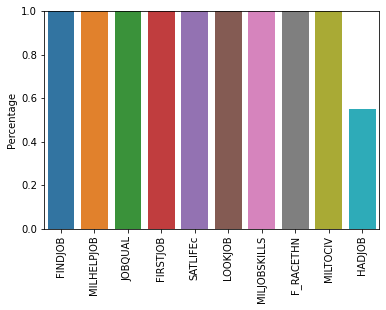

In [391]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### MILTOCIV - fill in values based on related variables

In [392]:
df['MILTOCIV'].value_counts()

Somewhat well      477
Not too well       375
Very well          224
Not well at all    187
Name: MILTOCIV, dtype: int64

In [393]:
df[df['MILTOCIV'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1398,Somewhat Satisfied,NaN,< 2 years,E7-E9,Married,No,No,Not injured,NaN,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,pre_911,Army,125000
1419,Somewhat Satisfied,Somewhat Dissatisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,Yes,30-49,Female,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Army,75000
1427,Somewhat Satisfied,Very Satisfied,3-4 years,E1-E6,Married,No,No,Not injured,NaN,Very Easy,...,No,50-64,Female,Some college(no degree),No,White,Married/Live with a partner,pre_911,Navy,31500
1453,Very Dissatisfied,NaN,3-4 years,E7-E9,Married,No,No,Not injured,NaN,Very Easy,...,No,65+,Male,Associate degree,No,White,Married/Live with a partner,pre_911,Air_Force,17500
1464,Very Satisfied,NaN,< 2 years,E1-E6,Married,No,Yes,Not injured,NaN,Somewhat Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,31500
1477,Very Satisfied,NaN,3-4 years,O1-O10,Married,Yes,No,Not injured,NaN,Somewhat Easy,...,No,65+,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,pre_911,Navy,125000
1512,Very Satisfied,NaN,< 2 years,E1-E6,Not Married,No,No,Not injured,NaN,Very Easy,...,No,65+,Male,High school degree,No,White,Married/Live with a partner,pre_911,Army,12500
1628,Very Satisfied,Very Satisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,NaN,Very Easy,...,No,65+,Male,Some college(no degree),No,White,Divorced/Seperated/Widowed,pre_911,Air_Force,150000
1790,Somewhat Satisfied,Very Satisfied,3-4 years,E1-E6,Not Married,No,Yes,Not injured,NaN,Very Easy,...,No,50-64,Male,Some college(no degree),No,NaN,Married/Live with a partner,pre_911,Marines,62500
1802,Somewhat Satisfied,Somewhat Satisfied,3-4 years,E1-E6,Not Married,No,No,Injured out of combat,NaN,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,0


In [394]:
# From CIVADJ, we somewhat know the relationship
df['CIVADJ'].value_counts()

Somewhat Easy         473
Very Easy             425
Somewhat difficult    294
Very difficult         85
Name: CIVADJ, dtype: int64

In [395]:
# Very Easy ---> Somewhat well/Very well
df[df['CIVADJ'] == 'Very Easy']['MILTOCIV'].value_counts()

Somewhat well      161
Very well          154
Not too well        63
Not well at all     38
Name: MILTOCIV, dtype: int64

In [396]:
# Somewhat Easy ---> Somewhat well
df[df['CIVADJ'] == 'Somewhat Easy']['MILTOCIV'].value_counts()

Somewhat well      224
Not too well       158
Very well           50
Not well at all     39
Name: MILTOCIV, dtype: int64

In [397]:
# Somewhat difficult ---> Not too well
df[df['CIVADJ'] == 'Somewhat difficult']['MILTOCIV'].value_counts()

Not too well       130
Somewhat well       83
Not well at all     58
Very well           20
Name: MILTOCIV, dtype: int64

In [398]:
# Very difficult ---> Not well at all
df[df['CIVADJ'] == 'Very difficult']['MILTOCIV'].value_counts()

Not well at all    52
Not too well       24
Somewhat well       9
Name: MILTOCIV, dtype: int64

In [399]:
easy = df[(df['MILTOCIV'].isnull()) & (df['CIVADJ'] == 'Very Easy')]
easy

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1398,Somewhat Satisfied,NaN,< 2 years,E7-E9,Married,No,No,Not injured,NaN,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,pre_911,Army,125000
1427,Somewhat Satisfied,Very Satisfied,3-4 years,E1-E6,Married,No,No,Not injured,NaN,Very Easy,...,No,50-64,Female,Some college(no degree),No,White,Married/Live with a partner,pre_911,Navy,31500
1453,Very Dissatisfied,NaN,3-4 years,E7-E9,Married,No,No,Not injured,NaN,Very Easy,...,No,65+,Male,Associate degree,No,White,Married/Live with a partner,pre_911,Air_Force,17500
1512,Very Satisfied,NaN,< 2 years,E1-E6,Not Married,No,No,Not injured,NaN,Very Easy,...,No,65+,Male,High school degree,No,White,Married/Live with a partner,pre_911,Army,12500
1628,Very Satisfied,Very Satisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,NaN,Very Easy,...,No,65+,Male,Some college(no degree),No,White,Divorced/Seperated/Widowed,pre_911,Air_Force,150000
1790,Somewhat Satisfied,Very Satisfied,3-4 years,E1-E6,Not Married,No,Yes,Not injured,NaN,Very Easy,...,No,50-64,Male,Some college(no degree),No,NaN,Married/Live with a partner,pre_911,Marines,62500
1802,Somewhat Satisfied,Somewhat Satisfied,3-4 years,E1-E6,Not Married,No,No,Injured out of combat,NaN,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,0
2004,Somewhat Dissatisfied,NaN,< 2 years,E1-E6,Not Married,No,No,Not injured,NaN,Very Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,44000
2131,Very Satisfied,NaN,3-4 years,E7-E9,Not Married,No,No,Injured out of combat,NaN,Very Easy,...,No,65+,Male,Some college(no degree),No,White,Married/Live with a partner,pre_911,Air_Force,75000


In [400]:
easy.index

Int64Index([1398, 1427, 1453, 1512, 1628, 1790, 1802, 2004, 2131], dtype='int64')

In [401]:
df.loc[easy.index,'MILTOCIV'] = 'Somewhat well'

In [402]:
df.loc[easy.index]['MILTOCIV']

1398    Somewhat well
1427    Somewhat well
1453    Somewhat well
1512    Somewhat well
1628    Somewhat well
1790    Somewhat well
1802    Somewhat well
2004    Somewhat well
2131    Somewhat well
Name: MILTOCIV, dtype: object

In [403]:
S_easy = df[(df['MILTOCIV'].isnull()) & (df['CIVADJ'] == 'Somewhat Easy')]
S_easy

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1464,Very Satisfied,NaN,< 2 years,E1-E6,Married,No,Yes,Not injured,NaN,Somewhat Easy,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Army,31500
1477,Very Satisfied,NaN,3-4 years,O1-O10,Married,Yes,No,Not injured,NaN,Somewhat Easy,...,No,65+,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,pre_911,Navy,125000


In [404]:
df.loc[S_easy.index,'MILTOCIV'] = 'Somewhat well'

In [405]:
df.loc[S_easy.index]['MILTOCIV']

1464    Somewhat well
1477    Somewhat well
Name: MILTOCIV, dtype: object

In [406]:
S_dif = df[(df['MILTOCIV'].isnull()) & (df['CIVADJ'] == 'Somewhat difficult')]
S_dif

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1419,Somewhat Satisfied,Somewhat Dissatisfied,< 2 years,E1-E6,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,Yes,30-49,Female,MS/PHD degree,No,White,Married/Live with a partner,pre_911,Army,75000
1841,Very Satisfied,Somewhat Satisfied,< 2 years,O1-O10,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,No,65+,Male,MS/PHD degree,No,White,Never Married,pre_911,Army,88000
2218,Somewhat Dissatisfied,NaN,3-4 years,E7-E9,Not Married,No,No,Not injured,NaN,Somewhat difficult,...,No,65+,Male,Bachelors degree,No,White,Married/Live with a partner,pre_911,Navy,22500


In [407]:
df.loc[S_dif.index,'MILTOCIV'] = 'Not too well'

In [408]:
df.loc[S_dif.index]['MILTOCIV']

1419    Not too well
1841    Not too well
2218    Not too well
Name: MILTOCIV, dtype: object

In [409]:
V_dif = df[(df['MILTOCIV'].isnull()) & (df['CIVADJ'] == 'Very difficult')]
V_dif

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income


In [410]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1010,79.09
MILHELPJOB,862,67.50
JOBQUAL,860,67.35
FIRSTJOB,860,67.35
SATLIFEc,639,50.04
LOOKJOB,393,30.78
MILJOBSKILLS,82,6.42
F_RACETHN,16,1.25
HADJOB,7,0.55


(0.0, 1.0)

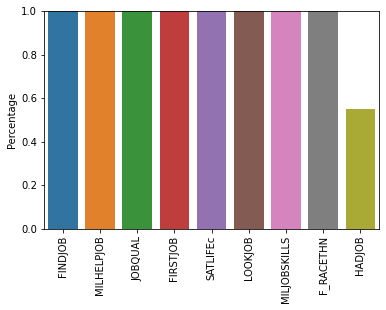

In [411]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### F_RACETHN - fill in values based on proportion

In [412]:
df['F_RACETHN'].value_counts()

White         982
Asian         113
Black         100
Mixed race     66
Name: F_RACETHN, dtype: int64

In [413]:
# There are 16 null rows
df[df['F_RACETHN'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1418,Somewhat Satisfied,NaN,3-4 years,E7-E9,Married,Yes,Yes,Not injured,Somewhat well,Somewhat difficult,...,No,65+,Male,Associate degree,No,NaN,Married/Live with a partner,pre_911,Army,22500
1467,Very Satisfied,NaN,< 2 years,O1-O10,Married,No,No,Not injured,Not too well,Very Easy,...,No,65+,Male,MS/PHD degree,No,NaN,Married/Live with a partner,pre_911,Army,44000
1484,Very Satisfied,Very Satisfied,>20 years,WO1-WO5,Married,Yes,Yes,Not injured,Somewhat well,Somewhat Easy,...,No,50-64,Male,Bachelors degree,No,NaN,Married/Live with a partner,post_911,Coast_Guard,75000
1668,Very Dissatisfied,Somewhat Satisfied,3-4 years,E1-E6,Not Married,No,No,Not injured,Somewhat well,Very Easy,...,No,50-64,Male,Bachelors degree,No,NaN,Never Married,pre_911,Navy,10000
1737,Somewhat Satisfied,Somewhat Dissatisfied,5-9 years,E7-E9,Married,Yes,No,Not injured,Not well at all,Very difficult,...,Yes,30-49,Male,High school degree,No,NaN,Married/Live with a partner,post_911,Marines,31500
1790,Somewhat Satisfied,Very Satisfied,3-4 years,E1-E6,Not Married,No,Yes,Not injured,Somewhat well,Very Easy,...,No,50-64,Male,Some college(no degree),No,NaN,Married/Live with a partner,pre_911,Marines,62500
1951,Somewhat Satisfied,NaN,3-4 years,E1-E6,Not Married,Yes,Yes,Not injured,Somewhat well,Very Easy,...,Yes,50-64,Male,Some college(no degree),No,NaN,Never Married,pre_911,Marines,45000
1988,Very Dissatisfied,NaN,< 2 years,E1-E6,Not Married,No,No,Injured out of combat,Not well at all,Very difficult,...,Yes,50-64,Male,Some college(no degree),No,NaN,Married/Live with a partner,pre_911,Army,7500
1991,Very Satisfied,Somewhat Satisfied,3-4 years,E7-E9,Married,No,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,MS/PHD degree,No,NaN,Divorced/Seperated/Widowed,pre_911,Air_Force,45000
2069,Somewhat Satisfied,NaN,< 2 years,E7-E9,Not Married,No,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,Bachelors degree,No,NaN,Married/Live with a partner,pre_911,Army,62500


In [414]:
# Percentage of different race
# White : 78%
# Asian : 9%
# Black : 8%
# Mixed race : 5%
df['F_RACETHN'].value_counts()/df['F_RACETHN'].value_counts().sum()

White         0.778747
Asian         0.089611
Black         0.079302
Mixed race    0.052339
Name: F_RACETHN, dtype: float64

In [415]:
# Assign them proportionally and randomly
as_white = df[df['F_RACETHN'].isnull()].sample(frac = 0.78)
as_white 

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1418,Somewhat Satisfied,NaN,3-4 years,E7-E9,Married,Yes,Yes,Not injured,Somewhat well,Somewhat difficult,...,No,65+,Male,Associate degree,No,NaN,Married/Live with a partner,pre_911,Army,22500
1737,Somewhat Satisfied,Somewhat Dissatisfied,5-9 years,E7-E9,Married,Yes,No,Not injured,Not well at all,Very difficult,...,Yes,30-49,Male,High school degree,No,NaN,Married/Live with a partner,post_911,Marines,31500
2255,Very Satisfied,NaN,3-4 years,E7-E9,Not Married,No,Yes,Not injured,Not too well,Very Easy,...,No,65+,Male,Some college(no degree),No,NaN,Married/Live with a partner,pre_911,Air_Force,0
1790,Somewhat Satisfied,Very Satisfied,3-4 years,E1-E6,Not Married,No,Yes,Not injured,Somewhat well,Very Easy,...,No,50-64,Male,Some college(no degree),No,NaN,Married/Live with a partner,pre_911,Marines,62500
1467,Very Satisfied,NaN,< 2 years,O1-O10,Married,No,No,Not injured,Not too well,Very Easy,...,No,65+,Male,MS/PHD degree,No,NaN,Married/Live with a partner,pre_911,Army,44000
2311,Very Satisfied,NaN,< 2 years,E7-E9,Not Married,No,Yes,Injured in combat,Not well at all,Very difficult,...,Yes,65+,Male,Associate degree,No,NaN,Married/Live with a partner,pre_911,Army,31500
2148,Very Dissatisfied,NaN,3-4 years,E1-E6,Not Married,No,No,Not injured,Very well,Very Easy,...,No,65+,Male,High school degree,No,NaN,Married/Live with a partner,pre_911,Army,7500
1668,Very Dissatisfied,Somewhat Satisfied,3-4 years,E1-E6,Not Married,No,No,Not injured,Somewhat well,Very Easy,...,No,50-64,Male,Bachelors degree,No,NaN,Never Married,pre_911,Navy,10000
1951,Somewhat Satisfied,NaN,3-4 years,E1-E6,Not Married,Yes,Yes,Not injured,Somewhat well,Very Easy,...,Yes,50-64,Male,Some college(no degree),No,NaN,Never Married,pre_911,Marines,45000
2069,Somewhat Satisfied,NaN,< 2 years,E7-E9,Not Married,No,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,Bachelors degree,No,NaN,Married/Live with a partner,pre_911,Army,62500


In [416]:
df.loc[as_white.index,'F_RACETHN'] = 'White'

In [417]:
df.loc[as_white.index]['F_RACETHN']

1418    White
1737    White
2255    White
1790    White
1467    White
2311    White
2148    White
1668    White
1951    White
2069    White
2180    White
2233    White
Name: F_RACETHN, dtype: object

In [418]:
# Asian: 2, Black:1, Mix:1
df[df['F_RACETHN'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1484,Very Satisfied,Very Satisfied,>20 years,WO1-WO5,Married,Yes,Yes,Not injured,Somewhat well,Somewhat Easy,...,No,50-64,Male,Bachelors degree,No,NaN,Married/Live with a partner,post_911,Coast_Guard,75000
1988,Very Dissatisfied,NaN,< 2 years,E1-E6,Not Married,No,No,Injured out of combat,Not well at all,Very difficult,...,Yes,50-64,Male,Some college(no degree),No,NaN,Married/Live with a partner,pre_911,Army,7500
1991,Very Satisfied,Somewhat Satisfied,3-4 years,E7-E9,Married,No,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,MS/PHD degree,No,NaN,Divorced/Seperated/Widowed,pre_911,Air_Force,45000
2331,Very Satisfied,NaN,>20 years,E7-E9,Married,Yes,Yes,Not injured,Very well,Very Easy,...,No,18-29,Male,MS/PHD degree,No,NaN,Married/Live with a partner,pre_911,Muti-Branch,22500


In [419]:
as_asian = df[df['F_RACETHN'].isnull()].sample(2)
as_asian 

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1988,Very Dissatisfied,NaN,< 2 years,E1-E6,Not Married,No,No,Injured out of combat,Not well at all,Very difficult,...,Yes,50-64,Male,Some college(no degree),No,NaN,Married/Live with a partner,pre_911,Army,7500
2331,Very Satisfied,NaN,>20 years,E7-E9,Married,Yes,Yes,Not injured,Very well,Very Easy,...,No,18-29,Male,MS/PHD degree,No,NaN,Married/Live with a partner,pre_911,Muti-Branch,22500


In [420]:
df.loc[as_asian.index,'F_RACETHN'] = 'Asian'

In [421]:
df.loc[as_asian.index]['F_RACETHN']

1988    Asian
2331    Asian
Name: F_RACETHN, dtype: object

In [422]:
df[df['F_RACETHN'].isnull()]

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1484,Very Satisfied,Very Satisfied,>20 years,WO1-WO5,Married,Yes,Yes,Not injured,Somewhat well,Somewhat Easy,...,No,50-64,Male,Bachelors degree,No,NaN,Married/Live with a partner,post_911,Coast_Guard,75000
1991,Very Satisfied,Somewhat Satisfied,3-4 years,E7-E9,Married,No,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,MS/PHD degree,No,NaN,Divorced/Seperated/Widowed,pre_911,Air_Force,45000


In [423]:
as_black = df[df['F_RACETHN'].isnull()].sample(1)
as_black

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1484,Very Satisfied,Very Satisfied,>20 years,WO1-WO5,Married,Yes,Yes,Not injured,Somewhat well,Somewhat Easy,...,No,50-64,Male,Bachelors degree,No,NaN,Married/Live with a partner,post_911,Coast_Guard,75000


In [424]:
df.loc[as_black.index,'F_RACETHN'] = 'Black'

In [425]:
df.loc[as_black.index]['F_RACETHN']

1484    Black
Name: F_RACETHN, dtype: object

In [426]:
as_mixed = df[df['F_RACETHN'].isnull()]
as_mixed

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1991,Very Satisfied,Somewhat Satisfied,3-4 years,E7-E9,Married,No,No,Not injured,Not too well,Somewhat Easy,...,No,65+,Male,MS/PHD degree,No,NaN,Divorced/Seperated/Widowed,pre_911,Air_Force,45000


In [427]:
df.loc[as_mixed.index,'F_RACETHN'] = 'Mixed race'

In [428]:
df.loc[as_mixed.index]['F_RACETHN']

1991    Mixed race
Name: F_RACETHN, dtype: object

In [429]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1010,79.09
MILHELPJOB,862,67.50
JOBQUAL,860,67.35
FIRSTJOB,860,67.35
SATLIFEc,639,50.04
LOOKJOB,393,30.78
MILJOBSKILLS,82,6.42
HADJOB,7,0.55


(0.0, 1.0)

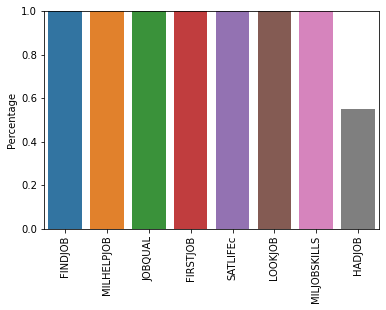

In [430]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);
plt.ylim(0,1)

#### P_Income - replaced with median value

In [431]:
# 0s are the missing data
df['p_income'].value_counts()

62500     199
31500     185
44000     156
75000     148
22500      74
63000      68
88000      51
0          50
17500      49
25000      43
35000      42
15000      42
45000      41
125000     34
12500      29
10000      22
150000     20
7500       18
5000        6
Name: p_income, dtype: int64

In [432]:
# For these people, fill in the Median of p_income
miss_income = df[df['p_income']==0]
miss_income

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
91,Somewhat Satisfied,Somewhat Satisfied,>20 years,E1-E6,Married,Yes,Yes,Injured out of combat,Somewhat well,Somewhat Easy,...,No,50-64,Male,Some college(no degree),No,Black,Married/Live with a partner,post_911,Marines,0
243,Very Satisfied,NaN,>20 years,O1-O10,Married,Yes,Yes,Not injured,Very well,Very Easy,...,No,65+,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Muti-Branch,0
758,Very Satisfied,NaN,>20 years,O1-O10,Married,Yes,Yes,Not injured,Very well,Very Easy,...,Yes,65+,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Air_Force,0
789,Somewhat Satisfied,Very Satisfied,>20 years,O1-O10,Married,Yes,Yes,Not injured,Somewhat well,Somewhat difficult,...,Yes,65+,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Army,0
802,Somewhat Satisfied,NaN,5-9 years,E7-E9,Married,No,Yes,Not injured,Not too well,Somewhat difficult,...,No,50-64,Male,Bachelors degree,No,White,Divorced/Seperated/Widowed,post_911,Army,0
937,Very Satisfied,Very Satisfied,>20 years,O1-O10,Married,Yes,Yes,Not injured,Somewhat well,Somewhat difficult,...,Yes,50-64,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Army,0
1037,Somewhat Satisfied,NaN,>20 years,O1-O10,Married,Yes,No,Not injured,Very well,Very Easy,...,No,50-64,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Air_Force,0
1107,Very Dissatisfied,Somewhat Dissatisfied,>20 years,E7-E9,Not Married,No,No,Injured out of combat,Not well at all,Very difficult,...,Yes,50-64,Male,Some college(no degree),No,Black,Never Married,post_911,Air_Force,0
1122,Somewhat Satisfied,NaN,>20 years,O1-O10,Married,Yes,Yes,Injured out of combat,Not too well,Somewhat Easy,...,No,50-64,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Army,0
1146,Very Satisfied,Somewhat Satisfied,>20 years,E7-E9,Married,No,Yes,Not injured,Somewhat well,Somewhat Easy,...,No,65+,Female,Bachelors degree,No,White,Married/Live with a partner,post_911,Navy,0


In [433]:
df['p_income'].median()

44000.0

In [434]:
df.loc[miss_income.index,'p_income'] = int(df['p_income'].median())

In [435]:
# Check
df.loc[miss_income.index]['p_income']

91      44000
243     44000
758     44000
789     44000
802     44000
937     44000
1037    44000
1107    44000
1122    44000
1146    44000
1166    44000
1385    44000
1391    44000
1434    44000
1441    44000
1508    44000
1533    44000
1534    44000
1567    44000
1601    44000
1620    44000
1621    44000
1629    44000
1646    44000
1695    44000
1698    44000
1781    44000
1802    44000
1811    44000
1847    44000
1901    44000
1932    44000
2000    44000
2020    44000
2063    44000
2107    44000
2120    44000
2125    44000
2133    44000
2145    44000
2179    44000
2181    44000
2206    44000
2244    44000
2255    44000
2280    44000
2287    44000
2316    44000
2347    44000
2349    44000
Name: p_income, dtype: int64

In [436]:
missing_df = missing_data(df)
missing_df

,# of rows,Percentage
FINDJOB,1010,79.09
MILHELPJOB,862,67.50
JOBQUAL,860,67.35
FIRSTJOB,860,67.35
SATLIFEc,639,50.04
LOOKJOB,393,30.78
MILJOBSKILLS,82,6.42
HADJOB,7,0.55


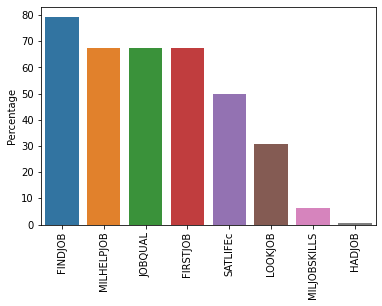

In [437]:
sns.barplot(x = missing_df['Percentage'].index, y=missing_df['Percentage'])
plt.xticks(rotation=90);


In [438]:
len(df)

1277

### Data Seperation : seperate the data into smdf and bdf

From this point, I would like to split the original data into two datasets :

1. smdf (small data) : This dataset would be the main dataset that includes all job related variables (FINDJOB, MILHELPJOB, JOQUAL, FIRSTJOB, LOOKJOB, MILJOBSKILLS). It was used in machine learning stage with the target label, FINDJOB.
2. bdf (big data) : This dataset would be treated as a supporting dataset that excludes all job related variables except HADJOB. It was mainly used in EDA stage for analyzing patterns.

The following are 8 variables that still include missing data :

1. HADJOB : Asked to everyone
2. LOOKJOB : Asked when HADJOB = No 
3. MILJOBSKILLS : Asked when HADJOB =Yes or when HADJOB = No & LOOKJOB = Yes (exclude retired veterans)

4. FINDJOB : Asked HADJOB = No & LOOKJOB = Yes(exclude retired veterans) & post 911
5. JOBQUAL : HADJOB = Yes or FINDJOB : 1-3 (exclude veterans didn’t find a job)& post 911
6. FIRSTJOB : HADJOB =Yes or FINDJOB:1-3(exclude veterans didn’t find a job)& post 911
7. MILHELPJOB : HADJOB =Yes or FINDJOB : 1-3(exclude veterans didn’t find a job)& post 911

In [439]:
# FINDJOB only has 267 non-null rows 
len(df[df['FINDJOB'].notnull()])

267

In [440]:
# Assign these rows to smdf 
smdf = df[df['FINDJOB'].notnull()]
smdf.head()

,SATLIFEb,SATLIFEc,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
29,Somewhat Satisfied,NaN,10-19 years,E7-E9,Married,No,Yes,Injured out of combat,Not too well,Very difficult,...,Yes,50-64,Male,Some college(no degree),No,Mixed race,Married/Live with a partner,post_911,Army,22500
32,Very Satisfied,NaN,>20 years,E1-E6,Married,Yes,Yes,Not injured,Somewhat well,Very Easy,...,No,65+,Male,High school degree,No,White,Married/Live with a partner,post_911,Muti-Branch,31500
40,Very Satisfied,NaN,>20 years,WO1-WO5,Married,Yes,No,Not injured,Somewhat well,Somewhat Easy,...,Yes,50-64,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Army,75000
48,Somewhat Satisfied,Somewhat Satisfied,>20 years,E7-E9,Married,Yes,No,Not injured,Somewhat well,Somewhat Easy,...,No,50-64,Male,Associate degree,No,White,Married/Live with a partner,post_911,Navy,31500
61,Very Satisfied,Somewhat Satisfied,>20 years,O1-O10,Married,No,Yes,Not injured,Somewhat well,Somewhat difficult,...,Yes,50-64,Male,MS/PHD degree,No,White,Married/Live with a partner,post_911,Air_Force,62500


In [441]:
# Dropping the following columns for bdf 
# since these variables are NaN in bdf
bdf = df.drop(['FINDJOB','MILHELPJOB','JOBQUAL','FIRSTJOB','LOOKJOB','MILJOBSKILLS'],axis=1)

In [442]:
# bdf has 25 variables
# 32-7=25
len(bdf.columns)

27

In [443]:
# Check whether there is missing value in data
missing_data(bdf)

,# of rows,Percentage
SATLIFEc,639,50.04
HADJOB,7,0.55


In [444]:
# Check whether there is missing value in smdf
missing_data(smdf)

,# of rows,Percentage
SATLIFEc,67,25.09
MILHELPJOB,19,7.12
JOBQUAL,18,6.74
FIRSTJOB,18,6.74


SATLIFEc have high percentage of missing data in both datasets. The best thing to do is to drop this variable completely. 

### Dealing with Missing Data in bdf 

#### SATLIFEc - drop rows

In [445]:
bdf =bdf.drop('SATLIFEc',axis=1)

In [446]:
missing_data(bdf)

,# of rows,Percentage
HADJOB,7,0.55


#### HADJOB - replaced with the highest frequency label
When you left the military, did you have a civilian job lined up ?

In [447]:
# Most veterans didn't have a job lined up when they leave
# There are 7 rows of missing data
df["HADJOB"].value_counts(dropna=False)

No     885
Yes    385
NaN      7
Name: HADJOB, dtype: int64

In [448]:
# Only 30% of veterans had a job lined up
df["HADJOB"].value_counts()/len(df["HADJOB"].notnull())

No     0.693031
Yes    0.301488
Name: HADJOB, dtype: float64

In [449]:
# The breakdown of veterans who answered
answer_hadjob = df[df['HADJOB'].notnull()]['RANK'].value_counts()
answer_hadjob

E1-E6      555
E7-E9      453
O1-O10     245
WO1-WO5     17
Name: RANK, dtype: int64

In [450]:
# The breakdown of veterans who answered Yes
yes_hadjob = df[df['HADJOB']=='Yes']['RANK'].value_counts()
yes_hadjob

E1-E6      130
E7-E9      128
O1-O10     121
WO1-WO5      6
Name: RANK, dtype: int64

In [451]:
# The percentage of yes from each rank
# officers have higher chances to have jobs lined up(doubled than enlisted)
job_lined_up = yes_hadjob/answer_hadjob
job_lined_up

E1-E6      0.234234
E7-E9      0.282561
O1-O10     0.493878
WO1-WO5    0.352941
Name: RANK, dtype: float64

In [452]:
# These rows have missings values to all the following columns from original data
# Remember that these questions were only given to post_911 veterans
df[df["HADJOB"].isnull()][['FINDJOB','MILHELPJOB','JOBQUAL','FIRSTJOB','LOOKJOB'
                           ,'MILJOBSKILLS','Group']]

,FINDJOB,MILHELPJOB,JOBQUAL,FIRSTJOB,LOOKJOB,MILJOBSKILLS,Group
1595,NaN,NaN,NaN,NaN,NaN,NaN,pre_911
1639,NaN,NaN,NaN,NaN,NaN,NaN,post_911
1659,NaN,NaN,NaN,NaN,NaN,NaN,pre_911
1731,NaN,NaN,NaN,NaN,NaN,NaN,pre_911
2098,NaN,NaN,NaN,NaN,NaN,NaN,pre_911
2100,NaN,NaN,NaN,NaN,NaN,NaN,pre_911
2218,NaN,NaN,NaN,NaN,NaN,NaN,pre_911


In [453]:
null_hadjob = df[df["HADJOB"].isnull()].index
null_hadjob

Int64Index([1595, 1639, 1659, 1731, 2098, 2100, 2218], dtype='int64')

In [454]:
bdf['HADJOB'].fillna(df['HADJOB'].value_counts().idxmax(),inplace=True)

In [455]:
# Check
bdf.loc[null_hadjob]['HADJOB']

1595    No
1639    No
1659    No
1731    No
2098    No
2100    No
2218    No
Name: HADJOB, dtype: object

In [456]:
# There is no missing data in bdf anymore
missing_data(bdf)

,# of rows,Percentage


### Dealing with Missing Data in smdf

In [457]:
# The percentage of missing data in SATLIFEc is too high
# Need to drop this variable
missing_smdf = missing_data(smdf)
missing_smdf

,# of rows,Percentage
SATLIFEc,67,25.09
MILHELPJOB,19,7.12
JOBQUAL,18,6.74
FIRSTJOB,18,6.74


#### SATLIFEc - drop rows

In [458]:
smdf =smdf.drop('SATLIFEc',axis=1)

In [459]:
missing_smdf = missing_data(smdf)
missing_smdf

,# of rows,Percentage
MILHELPJOB,19,7.12
FIRSTJOB,18,6.74
JOBQUAL,18,6.74


#### MILHELPJOB - drop rows and replaced with the highest frequency label

In [460]:
# These people probably answer FINDJOB 4 : I didn't find one
# They have too many missing data,I need to drop these rows
mil_nan = smdf[smdf['MILHELPJOB'].isnull()][['HADJOB','FINDJOB','MILHELPJOB',
                                             'JOBQUAL','FIRSTJOB','LOOKJOB']]
mil_nan

,HADJOB,FINDJOB,MILHELPJOB,JOBQUAL,FIRSTJOB,LOOKJOB
29,No,>6 months,NaN,NaN,NaN,Yes(Not right away)
202,No,>6 months,NaN,NaN,NaN,Yes(right away)
417,No,>6 months,NaN,NaN,NaN,Yes(Not right away)
622,No,>6 months,NaN,NaN,NaN,Yes(right away)
714,No,>6 months,NaN,NaN,NaN,Yes(right away)
807,No,>6 months,NaN,NaN,NaN,Yes(Not right away)
871,No,>6 months,NaN,NaN,NaN,Yes(Not right away)
1052,No,>6 months,NaN,NaN,NaN,Yes(Not right away)
1099,No,>6 months,NaN,Overqualified,6 months- 1yr,Yes(right away)
1116,No,>6 months,NaN,NaN,NaN,Yes(right away)


In [461]:
# skipping row 1099
mil_nan = mil_nan[:8] + mil_nan[9:]

In [462]:
smdf = smdf.drop(mil_nan.index,axis=0)

In [463]:
len(smdf)

249

In [464]:
missing_smdf = missing_data(smdf)
missing_smdf

,# of rows,Percentage
MILHELPJOB,1,0.4


In [465]:
# 1099
smdf[smdf['MILHELPJOB'].isnull()]

,SATLIFEb,YEARSERV,RANK,MARRACTIV,PARACTIV,COMBAT,INJURED,MILTOCIV,CIVADJ,VABENEFITS,...,TRAUMA1,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACETHN,F_MARITAL,Group,Branch,p_income
1099,Somewhat Satisfied,5-9 years,O1-O10,Married,No,No,Not injured,Not too well,Very difficult,Yes,...,No,30-49,Male,Bachelors degree,No,White,Married/Live with a partner,post_911,Air_Force,62500


In [466]:
smdf['MILHELPJOB'].value_counts()

Neither         87
Helped a lot    86
Helped a bit    60
hurt a bit       9
hurt a lot       6
Name: MILHELPJOB, dtype: int64

In [467]:
# Fill in with the highest frequency option
smdf['MILHELPJOB'].fillna(smdf['MILHELPJOB'].value_counts().idxmax(),inplace=True)

In [468]:
# There's no more missing data in smdf
missing_smdf = missing_data(smdf)
missing_smdf

,# of rows,Percentage


In [469]:
len(smdf.columns)

32

In [470]:
# smdf only contains people that don't have job lined up before they leave
smdf['HADJOB'].unique()

array(['No'], dtype=object)

In [471]:
smdf['Group'].unique()

array(['post_911'], dtype=object)

In [472]:
# drop HADJOB column since it only has one value "No"
smdf = smdf.drop(['HADJOB','Group'],axis=1)

In [473]:
len(smdf.columns)

30

In [474]:
smdf.columns

Index(['SATLIFEb', 'YEARSERV', 'RANK', 'MARRACTIV', 'PARACTIV', 'COMBAT',
       'INJURED', 'MILTOCIV', 'CIVADJ', 'VABENEFITS', 'CIVADJPROBa',
       'CIVADJPROBb', 'CIVADJISSc', 'CIVADJISSe', 'LOOKJOB', 'SCHOOL',
       'MILJOBSKILLS', 'FINDJOB', 'JOBQUAL', 'FIRSTJOB', 'MILHELPJOB',
       'TRAUMA1', 'F_AGECAT', 'F_SEX', 'F_EDUCCAT2', 'F_HISP', 'F_RACETHN',
       'F_MARITAL', 'Branch', 'p_income'],
      dtype='object')

In [475]:
len(smdf)

249

In [476]:
smdf[smdf['HADJOB']=='Yes']

KeyError: 'HADJOB'

## Saving cleaned files

In [ ]:
smdf.to_csv("smdf_clean.csv",index=False)

In [ ]:
bdf.to_csv("bdf_clean.csv",index=False)